<a href="https://colab.research.google.com/github/rubenpadilla-oss/Portafolio/blob/3/examen_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nombres: Ruben Padilla - Cristian ILLANES

# Uso de la api del banco mundial


La versión 1.0.12 del  paquete wbgapi de Python  ya está disponible. Este paquete lleva casi un año en el  Índice de Paquetes de Python  y la última versión incorpora varias funciones nuevas para que la exploración y la búsqueda en bases de datos sean más sencillas e interactivas.

Los paquetes de Python para datos del Banco Mundial existen desde hace tiempo, pero WBGAPI es relativamente nuevo. Creé este paquete para aprovechar algunas mejoras de la API que también existen desde hace tiempo, pero que eran difíciles de entender o usar, y no contaban con el soporte de otros paquetes. También quería mejorar  la compatibilidad con Pandas  y, en general, facilitar la recuperación de datos sin necesidad de código adicional.

El  archivo README  ofrece una descripción general y el propio paquete proporciona documentación extensa mediante la función de ayuda de Python. Para empezar, aquí tiene un breve resumen de cinco características que hacen que WBGAPI sea único.

In [ ]:
#Funcion de importacion de datos del Banco mundial
%pip install wbgapi

In [ ]:
import wbgapi as wb
from datetime import datetime
from google.colab import files, drive
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/MyDrive/examen cdde')

import my_func as fn
import seaborn as sns

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
indicadores_wb = {
    "NY.GDP.MKTP.PP.KD": "GDP, PPP (constant 2021 international $)",
    "SP.POP.GROW": "Population growth (annual %)",
    "SP.POP.TOTL": "Population, total",
    "SP.POP.TOTL.FE.IN": "Population, female",
    "SP.POP.TOTL.FE.ZS": "Population, female (% of total population)",
    "SP.POP.TOTL.MA.IN": "Population, male",
    "SP.POP.TOTL.MA.ZS": "Population, male (% of total population)",
    "SP.URB.GROW": "Urban population growth (annual %)",
    "SP.URB.TOTL": "Urban population",
    "SP.URB.TOTL.IN.ZS": "Urban population (% of total population)",
    "SP.RUR.TOTL": "Rural population",
    "SP.RUR.TOTL.ZG": "Rural population growth (annual %)",
    "SP.RUR.TOTL.ZS": "Rural population (% of total population)",
    "SL.TLF.TOTL.IN": "Labor force, total",
    "SL.TLF.TOTL.FE.ZS": "Labor force, female (% of total labor force)",
    "SL.UEM.TOTL.FE.NE.ZS": "Unemployment, female (% of female labor force) (national estimate)",
    "SL.UEM.TOTL.FE.ZS": "Unemployment, female (% of female labor force) (modeled ILO estimate)",
    "SL.UEM.TOTL.MA.NE.ZS": "Unemployment, male (% of male labor force) (national estimate)",
    "SL.UEM.TOTL.MA.ZS": "Unemployment, male (% of male labor force) (modeled ILO estimate)",
    "SL.UEM.TOTL.NE.ZS": "Unemployment, total (% of total labor force) (national estimate)",
    "SL.UEM.TOTL.ZS": "Unemployment, total (% of total labor force) (modeled ILO estimate)",
    "FP.CPI.TOTL.ZG": "Inflation, consumer prices (annual %)",
    "GC.TAX.EXPT.CN": "Taxes on exports (current LCU)",
    "GC.TAX.EXPT.ZS": "Taxes on exports (% of tax revenue)",
    "NE.EXP.GNFS.KD.ZG": "Exports of goods and services (annual % growth)",
    "NE.EXP.GNFS.KN": "Exports of goods and services (constant LCU)",
    "NE.EXP.GNFS.ZS": "Exports of goods and services (% of GDP)",
    "NV.AGR.TOTL.CD": "Agriculture, forestry, and fishing, value added (current US$)",
    "NV.AGR.TOTL.CN": "Agriculture, forestry, and fishing, value added (current LCU)",
    "NV.IND.MANF.CD": "Manufacturing, value added (current US$)",
    "NV.IND.MANF.CN": "Manufacturing, value added (current LCU)",
    "NV.IND.TOTL.CD": "Industry (including construction), value added (current US$)",
    "NV.IND.TOTL.CN": "Industry (including construction), value added (current LCU)",
    "NV.SRV.TOTL.CD": "Services, value added (current US$)",
    "NV.SRV.TOTL.CN": "Services, value added (current LCU)",
    "GE.EST": "Government Effectiveness: Estimate",
    "NE.CON.GOVT.KN": "General government final consumption expenditure (constant LCU)",
    "NE.CON.GOVT.ZS": "General government final consumption expenditure (% of GDP)",
    "NE.CON.PRVT.CD": "Households and NPISHs Final consumption expenditure (current US$)",
    "NE.CON.PRVT.CN": "Households and NPISHs Final consumption expenditure (current LCU)",
    "GC.DOD.TOTL.CN": "Central government debt, total (current LCU)",
    "GC.DOD.TOTL.GD.ZS": "Central government debt, total (% of GDP)",
    "BM.KLT.DINV.CD.WD": "Foreign direct investment, net outflows (BoP, current US$)",
    "BX.KLT.DINV.WD.GD.ZS": "Foreign direct investment, net inflows (% of GDP)",
    "EG.ELC.LOSS.ZS": "Electric power transmission and distribution losses (% of output)",
    "EG.USE.ELEC.KH.PC": "Electric power consumption (kWh per capita)",
    "EN.GHG.CO2.IP.MT.CE.AR5": "Carbon dioxide emissions from Industrial Processes (Mt CO2e)",
    "SE.PRM.NENR": "School enrollment, primary (% net)",
    "SE.PRM.NENR.FE": "School enrollment, primary, female (% net)",
    "SE.PRM.NENR.MA": "School enrollment, primary, male (% net)",
    "SE.SEC.ENRR": "School enrollment, secondary (% gross)",
    "SE.SEC.ENRR.FE": "School enrollment, secondary, female (% gross)",
    "SE.SEC.ENRR.MA": "School enrollment, secondary, male (% gross)",
    "SE.TER.ENRR": "School enrollment, tertiary (% gross)",
    "SE.TER.ENRR.FE": "School enrollment, tertiary, female (% gross)",
    "SE.TER.ENRR.MA": "School enrollment, tertiary, male (% gross)",
    "SP.DYN.LE00.IN": "Life expectancy at birth, total (years)",
    "SP.DYN.LE00.FE.IN": "Life expectancy at birth, female (years)",
    "SP.DYN.LE00.MA.IN": "Life expectancy at birth, male (years)",
    "EG.CFT.ACCS.ZS": "Access to clean fuels and technologies for cooking (% of population)",
    "EG.CFT.ACCS.RU.ZS": "Access to clean fuels and technologies for cooking, rural (% of rural population)",
    "EG.CFT.ACCS.UR.ZS": "Access to clean fuels and technologies for cooking, urban (% of urban population)",
    "IT.NET.USER.FE.ZS": "Individuals using the Internet, female (% of female population)",
    "IT.NET.USER.MA.ZS": "Individuals using the Internet, male (% of male population)",
    "IT.NET.USER.ZS": "Individuals using the Internet (% of population)",
}


In [ ]:
df_wb_raw = fn.descargar_en_chunks(indicadores_wb, años=2023, chunk_size=15)

Descargando bloque 1: ['NY.GDP.MKTP.PP.KD', 'SP.POP.GROW', 'SP.POP.TOTL', 'SP.POP.TOTL.FE.IN', 'SP.POP.TOTL.FE.ZS', 'SP.POP.TOTL.MA.IN', 'SP.POP.TOTL.MA.ZS', 'SP.URB.GROW', 'SP.URB.TOTL', 'SP.URB.TOTL.IN.ZS', 'SP.RUR.TOTL', 'SP.RUR.TOTL.ZG', 'SP.RUR.TOTL.ZS', 'SL.TLF.TOTL.IN', 'SL.TLF.TOTL.FE.ZS']
Descargando bloque 2: ['SL.UEM.TOTL.FE.NE.ZS', 'SL.UEM.TOTL.FE.ZS', 'SL.UEM.TOTL.MA.NE.ZS', 'SL.UEM.TOTL.MA.ZS', 'SL.UEM.TOTL.NE.ZS', 'SL.UEM.TOTL.ZS', 'FP.CPI.TOTL.ZG', 'GC.TAX.EXPT.CN', 'GC.TAX.EXPT.ZS', 'NE.EXP.GNFS.KD.ZG', 'NE.EXP.GNFS.KN', 'NE.EXP.GNFS.ZS', 'NV.AGR.TOTL.CD', 'NV.AGR.TOTL.CN', 'NV.IND.MANF.CD']
Descargando bloque 3: ['NV.IND.MANF.CN', 'NV.IND.TOTL.CD', 'NV.IND.TOTL.CN', 'NV.SRV.TOTL.CD', 'NV.SRV.TOTL.CN', 'GE.EST', 'NE.CON.GOVT.KN', 'NE.CON.GOVT.ZS', 'NE.CON.PRVT.CD', 'NE.CON.PRVT.CN', 'GC.DOD.TOTL.CN', 'GC.DOD.TOTL.GD.ZS', 'BM.KLT.DINV.CD.WD', 'BX.KLT.DINV.WD.GD.ZS', 'EG.ELC.LOSS.ZS']
Descargando bloque 4: ['EG.USE.ELEC.KH.PC', 'EN.GHG.CO2.IP.MT.CE.AR5', 'SE.PRM.NENR', '

# Etapa 1: Análisis Descriptivo e Imputación de Datos

## Análisis exploratorio de datos



In [ ]:
# Utilizamos la funcion .head() para ver las primeras filas de los datos
df_wb_raw.head()

country             Country  NY.GDP.MKTP.PP.KD  SL.TLF.TOTL.FE.ZS  \
0     ZWE            Zimbabwe       8.526678e+10          49.843240   
1     ZMB              Zambia       7.612916e+10          46.170619   
3     PSE  West Bank and Gaza       2.769440e+10                NaN   
5     VNM            Viet Nam       1.359364e+12          48.623244   
7     VUT             Vanuatu       1.030020e+09          46.126995   

   SL.TLF.TOTL.IN  SP.POP.GROW  SP.POP.TOTL  SP.POP.TOTL.FE.IN  \
0       6232464.0     1.677096   16340822.0          8559888.0   
1       7147630.0     2.794068   20723965.0         10467717.0   
3             NaN     2.393265    5165775.0          2598445.0   
5      56799003.0     0.671429  100352192.0         51201223.0   
7        115453.0     2.324816     320409.0           158611.0   

   SP.POP.TOTL.FE.ZS  SP.POP.TOTL.MA.IN  ...  SE.TER.ENRR.FE  SE.TER.ENRR.MA  \
0          52.383460          7780934.0  ...             NaN             NaN   
1          50.510204         10256248.0  ...             NaN             NaN   
3          50.301172          2567330.0  ...       54.781748       33.968858   
5          51.021529         49150969.0  ...       36.077468       29.637136   
7          49.502667           161798.0  ...             NaN             NaN   

   SP.DYN.LE00.FE.IN  SP.DYN.LE00.IN  SP.DYN.LE00.MA.IN  EG.CFT.ACCS.RU.ZS  \
0             65.013          62.775             60.226                7.5   
1             68.673          66.349             63.936                2.3   
3             71.502          65.170             59.691                NaN   
5             79.264          74.588             69.877               98.7   
7             73.927          71.477             69.445                9.0   

   EG.CFT.ACCS.UR.ZS  IT.NET.USER.FE.ZS  IT.NET.USER.MA.ZS  IT.NET.USER.ZS  
0               77.0                NaN                NaN         38.4266  
1               16.8                NaN                NaN         33.0000  
3                NaN            86.2802            86.9849         86.6377  
5               99.4            75.8894            80.3200         78.0800  
7               52.3                NaN                NaN         45.7313  

[5 rows x 67 columns]

In [ ]:
# Utilizamos la funcion .tail() para ver las ultimas filas de los datos
df_wb_raw.tail()

country                         Country  NY.GDP.MKTP.PP.KD  \
261     CEB  Central Europe and the Baltics       4.218704e+12   
262     CSS          Caribbean small states       1.338577e+11   
263     ARB                      Arab World       8.097600e+12   
264     AFW      Africa Western and Central       2.992692e+12   
265     AFE     Africa Eastern and Southern       3.065002e+12   

     SL.TLF.TOTL.FE.ZS  SL.TLF.TOTL.IN  SP.POP.GROW  SP.POP.TOTL  \
261          45.670155      49100893.0     0.111693  100183707.0   
262          43.965332       1919128.0     0.501131    4519904.0   
263          19.141318     132483437.0     2.255866  482105978.0   
264          46.355771     212022202.0     2.386204  509398589.0   
265          47.278292     288476515.0     2.519167  750491370.0   

     SP.POP.TOTL.FE.IN  SP.POP.TOTL.FE.ZS  SP.POP.TOTL.MA.IN  ...  \
261         51639515.0          51.544825         48544192.0  ...   
262          2293907.0          50.751230          2225997.0  ...   
263        232702770.0          48.267971        249403208.0  ...   
264        252899429.0          49.646669        256499160.0  ...   
265        379019549.0          50.502852        371471821.0  ...   

     SE.TER.ENRR.FE  SE.TER.ENRR.MA  SP.DYN.LE00.FE.IN  SP.DYN.LE00.IN  \
261       80.939987       56.712559          81.624607       77.896625   
262             NaN             NaN          76.456921       73.171645   
263       34.757931       31.807100          74.418910       72.444678   
264             NaN             NaN          59.997102       58.855722   
265             NaN             NaN          67.914632       65.146154   

     SP.DYN.LE00.MA.IN  EG.CFT.ACCS.RU.ZS  EG.CFT.ACCS.UR.ZS  \
261          74.354109         100.000000         100.000000   
262          69.986624          95.267180          98.879872   
263          70.619437          77.839625          93.857501   
264          57.752356           6.004144          45.206379   
265          62.395419          10.288154          41.289974   

     IT.NET.USER.FE.ZS  IT.NET.USER.MA.ZS  IT.NET.USER.ZS  
261                NaN                NaN             NaN  
262                NaN                NaN             NaN  
263                NaN                NaN             NaN  
264               33.0               44.0            38.5  
265               24.8               30.9            27.8  

[5 rows x 67 columns]



> Al revisar los primeros y ultimos registros se observa que la extraccion de datos contiene datos de paises y agrupaciones economicas. por lo tanto se procede a limpiar los datos.




## Identificar el número de países, años y variables disponibles.



In [ ]:
# Importacion de libreria pandas
import pandas as pd

In [ ]:
# Identificacion de paises reales
table_dict = vars(wb.economy.info())
df_paises = pd.DataFrame(table_dict.get('items'))
iso_list = list(df_paises[df_paises['aggregate'] == False]['id'])

In [ ]:
# filtramos el dataframe para que este en orden consecutivo
df_wb_raw = df_wb_raw[df_wb_raw['country'].isin(iso_list)].reset_index(drop = True)

In [ ]:
df_wb_raw.head()

country             Country  NY.GDP.MKTP.PP.KD  SL.TLF.TOTL.FE.ZS  \
0     ZWE            Zimbabwe       8.526678e+10          49.843240   
1     ZMB              Zambia       7.612916e+10          46.170619   
2     PSE  West Bank and Gaza       2.769440e+10                NaN   
3     VNM            Viet Nam       1.359364e+12          48.623244   
4     VUT             Vanuatu       1.030020e+09          46.126995   

   SL.TLF.TOTL.IN  SP.POP.GROW  SP.POP.TOTL  SP.POP.TOTL.FE.IN  \
0       6232464.0     1.677096   16340822.0          8559888.0   
1       7147630.0     2.794068   20723965.0         10467717.0   
2             NaN     2.393265    5165775.0          2598445.0   
3      56799003.0     0.671429  100352192.0         51201223.0   
4        115453.0     2.324816     320409.0           158611.0   

   SP.POP.TOTL.FE.ZS  SP.POP.TOTL.MA.IN  ...  SE.TER.ENRR.FE  SE.TER.ENRR.MA  \
0          52.383460          7780934.0  ...             NaN             NaN   
1          50.510204         10256248.0  ...             NaN             NaN   
2          50.301172          2567330.0  ...       54.781748       33.968858   
3          51.021529         49150969.0  ...       36.077468       29.637136   
4          49.502667           161798.0  ...             NaN             NaN   

   SP.DYN.LE00.FE.IN  SP.DYN.LE00.IN  SP.DYN.LE00.MA.IN  EG.CFT.ACCS.RU.ZS  \
0             65.013          62.775             60.226                7.5   
1             68.673          66.349             63.936                2.3   
2             71.502          65.170             59.691                NaN   
3             79.264          74.588             69.877               98.7   
4             73.927          71.477             69.445                9.0   

   EG.CFT.ACCS.UR.ZS  IT.NET.USER.FE.ZS  IT.NET.USER.MA.ZS  IT.NET.USER.ZS  
0               77.0                NaN                NaN         38.4266  
1               16.8                NaN                NaN         33.0000  
2                NaN            86.2802            86.9849         86.6377  
3               99.4            75.8894            80.3200         78.0800  
4               52.3                NaN                NaN         45.7313  

[5 rows x 67 columns]

In [ ]:
df_wb_raw.tail()

country      Country  NY.GDP.MKTP.PP.KD  SL.TLF.TOTL.FE.ZS  \
193     AGO       Angola       3.229678e+11          49.450638   
194     AND      Andorra       5.225828e+09                NaN   
195     DZA      Algeria       6.998184e+11          16.830056   
196     ALB      Albania       4.944312e+10          44.994435   
197     AFG  Afghanistan       8.223848e+10           6.846247   

     SL.TLF.TOTL.IN  SP.POP.GROW  SP.POP.TOTL  SP.POP.TOTL.FE.IN  \
193      15430003.0     3.080655   36749906.0         18568216.0   
194             NaN     1.433748      80856.0            39502.0   
195      13174228.0     1.498976   46164219.0         22614984.0   
196       1210263.0    -1.543108    2414095.0          1220548.0   
197       8866507.0     2.135594   41454761.0         20530683.0   

     SP.POP.TOTL.FE.ZS  SP.POP.TOTL.MA.IN  ...  SE.TER.ENRR.FE  \
193          50.525887         18181690.0  ...        9.933616   
194          48.854754            41354.0  ...       68.003820   
195          48.988123         23549235.0  ...       67.258843   
196          50.559226          1193547.0  ...       77.031527   
197          49.525513         20924078.0  ...             NaN   

     SE.TER.ENRR.MA  SP.DYN.LE00.FE.IN  SP.DYN.LE00.IN  SP.DYN.LE00.MA.IN  \
193       10.165600             67.144          64.617             62.099   
194       57.193764             86.107          84.041             82.100   
195       44.258295             77.696          76.261             74.895   
196       52.749937             81.446          79.602             77.728   
197             NaN             67.536          66.035             64.467   

     EG.CFT.ACCS.RU.ZS  EG.CFT.ACCS.UR.ZS  IT.NET.USER.FE.ZS  \
193                8.4               75.0                NaN   
194              100.0              100.0                NaN   
195               99.1               99.9                NaN   
196               72.5               95.2            81.7239   
197               20.4               87.0                NaN   

     IT.NET.USER.MA.ZS  IT.NET.USER.ZS  
193                NaN         44.7581  
194                NaN         95.4456  
195                NaN         76.9081  
196              84.59         83.1356  
197                NaN         17.7089  

[5 rows x 67 columns]

## Identificacion de Valores Nulos

In [ ]:
df_wb_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 67 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country                  198 non-null    object 
 1   Country                  198 non-null    object 
 2   NY.GDP.MKTP.PP.KD        198 non-null    float64
 3   SL.TLF.TOTL.FE.ZS        173 non-null    float64
 4   SL.TLF.TOTL.IN           173 non-null    float64
 5   SP.POP.GROW              198 non-null    float64
 6   SP.POP.TOTL              198 non-null    float64
 7   SP.POP.TOTL.FE.IN        198 non-null    float64
 8   SP.POP.TOTL.FE.ZS        198 non-null    float64
 9   SP.POP.TOTL.MA.IN        198 non-null    float64
 10  SP.POP.TOTL.MA.ZS        198 non-null    float64
 11  SP.RUR.TOTL              198 non-null    float64
 12  SP.RUR.TOTL.ZG           189 non-null    float64
 13  SP.RUR.TOTL.ZS           198 non-null    float64
 14  SP.URB.GROW              1

<Axes: >

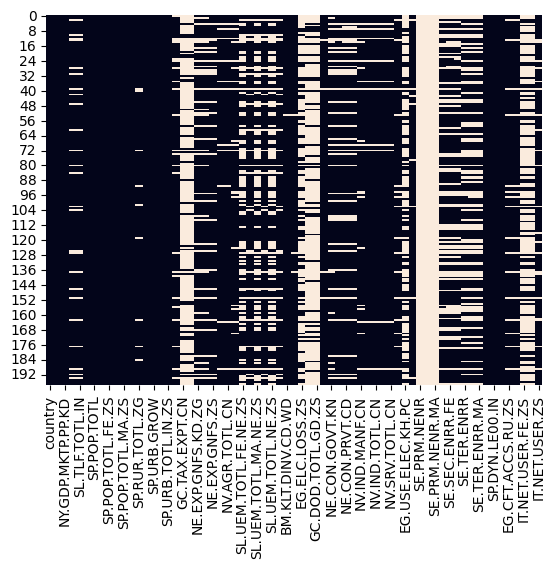

In [ ]:
# Utilizamos sns.heatmap(), para identificar columnas con mas valores faltantes
import seaborn as sns
sns.heatmap(df_wb_raw.isnull(), cbar=False)


> Existen variables con un alto volumen de datos faltantes. usaremos la siguiente regla para el tratamiento de los mismos



*   si "NaN" > 15% Se procede a eliminar la variable
*   si "NaN" < 15% Se procede a imputar datos



In [ ]:
mask_bool = df_wb_raw.isna().mean()>0.15

drop_colums = list(df_wb_raw.isna().mean()[mask_bool].index)

df_wb_limpio = df_wb_raw.drop(columns=drop_colums)

In [ ]:
df_wb_raw.isna().mean()

country              0.000000
Country              0.000000
NY.GDP.MKTP.PP.KD    0.000000
SL.TLF.TOTL.FE.ZS    0.126263
SL.TLF.TOTL.IN       0.126263
                       ...   
EG.CFT.ACCS.RU.ZS    0.080808
EG.CFT.ACCS.UR.ZS    0.080808
IT.NET.USER.FE.ZS    0.712121
IT.NET.USER.MA.ZS    0.712121
IT.NET.USER.ZS       0.106061
Length: 67, dtype: float64

## Cantidad de datos del dataframe

In [ ]:
print(f"El dataframe contiene {df_wb_limpio.shape[0]} filas y {df_wb_limpio.shape[1]} columnas de las cuales {len(df_wb_limpio.isna().sum()[df_wb_limpio.isna().mean()>0].index)} coninene datos nulos bajo el 15%")


El dataframe contiene 198 filas y 41 columnas de las cuales 24 coninene datos nulos bajo el 15%


In [ ]:
df_wb_limpio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country                  198 non-null    object 
 1   Country                  198 non-null    object 
 2   NY.GDP.MKTP.PP.KD        198 non-null    float64
 3   SL.TLF.TOTL.FE.ZS        173 non-null    float64
 4   SL.TLF.TOTL.IN           173 non-null    float64
 5   SP.POP.GROW              198 non-null    float64
 6   SP.POP.TOTL              198 non-null    float64
 7   SP.POP.TOTL.FE.IN        198 non-null    float64
 8   SP.POP.TOTL.FE.ZS        198 non-null    float64
 9   SP.POP.TOTL.MA.IN        198 non-null    float64
 10  SP.POP.TOTL.MA.ZS        198 non-null    float64
 11  SP.RUR.TOTL              198 non-null    float64
 12  SP.RUR.TOTL.ZG           189 non-null    float64
 13  SP.RUR.TOTL.ZS           198 non-null    float64
 14  SP.URB.GROW              1

In [ ]:
df_wb_limpio.index = df_wb_limpio['Country']

In [ ]:
df_wb_limpio = df_wb_limpio.drop(columns = ["country","Country"])

In [ ]:
df_wb_limpio.head()

NY.GDP.MKTP.PP.KD  SL.TLF.TOTL.FE.ZS  SL.TLF.TOTL.IN  \
Country                                                                    
Zimbabwe                 8.526678e+10          49.843240       6232464.0   
Zambia                   7.612916e+10          46.170619       7147630.0   
West Bank and Gaza       2.769440e+10                NaN             NaN   
Viet Nam                 1.359364e+12          48.623244      56799003.0   
Vanuatu                  1.030020e+09          46.126995        115453.0   

                    SP.POP.GROW  SP.POP.TOTL  SP.POP.TOTL.FE.IN  \
Country                                                           
Zimbabwe               1.677096   16340822.0          8559888.0   
Zambia                 2.794068   20723965.0         10467717.0   
West Bank and Gaza     2.393265    5165775.0          2598445.0   
Viet Nam               0.671429  100352192.0         51201223.0   
Vanuatu                2.324816     320409.0           158611.0   

                    SP.POP.TOTL.FE.ZS  SP.POP.TOTL.MA.IN  SP.POP.TOTL.MA.ZS  \
Country                                                                       
Zimbabwe                    52.383460          7780934.0          47.616540   
Zambia                      50.510204         10256248.0          49.489796   
West Bank and Gaza          50.301172          2567330.0          49.698828   
Viet Nam                    51.021529         49150969.0          48.978471   
Vanuatu                     49.502667           161798.0          50.497333   

                    SP.RUR.TOTL  ...  NV.SRV.TOTL.CD  NV.SRV.TOTL.CN  \
Country                          ...                                   
Zimbabwe              9920197.0  ...    1.777929e+10    3.348446e+10   
Zambia               11392257.0  ...    1.566890e+10    3.167001e+11   
West Bank and Gaza     678902.0  ...    1.044720e+10    1.044720e+10   
Viet Nam             62088011.0  ...    1.834968e+11    4.364896e+15   
Vanuatu                249069.0  ...             NaN             NaN   

                    EG.CFT.ACCS.ZS  EN.GHG.CO2.IP.MT.CE.AR5  \
Country                                                       
Zimbabwe                      30.7                   0.9636   
Zambia                         9.2                   1.2905   
West Bank and Gaza             NaN                      NaN   
Viet Nam                      98.7                  50.1898   
Vanuatu                       20.6                   0.0011   

                    SP.DYN.LE00.FE.IN  SP.DYN.LE00.IN  SP.DYN.LE00.MA.IN  \
Country                                                                    
Zimbabwe                       65.013          62.775             60.226   
Zambia                         68.673          66.349             63.936   
West Bank and Gaza             71.502          65.170             59.691   
Viet Nam                       79.264          74.588             69.877   
Vanuatu                        73.927          71.477             69.445   

                    EG.CFT.ACCS.RU.ZS  EG.CFT.ACCS.UR.ZS  IT.NET.USER.ZS  
Country                                                                   
Zimbabwe                          7.5               77.0         38.4266  
Zambia                            2.3               16.8         33.0000  
West Bank and Gaza                NaN                NaN         86.6377  
Viet Nam                         98.7               99.4         78.0800  
Vanuatu                           9.0               52.3         45.7313  

[5 rows x 39 columns]

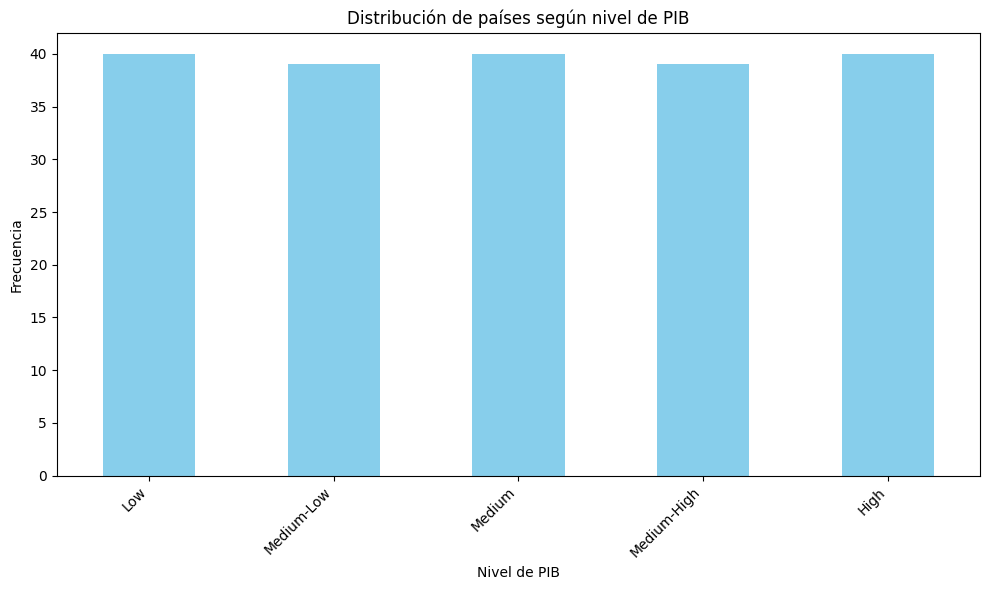

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Definir los umbrales para las categorías de PIB
# Usaremos percentiles para definir los umbrales de manera relativa a la distribución actual

percentiles = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
bins = df_wb_raw['NY.GDP.MKTP.PP.KD'].quantile(percentiles).tolist()

orden = ['Low', 'Medium-Low', 'Medium', 'Medium-High', 'High']

# Si hay menos bins que categorías deseadas (por ejemplo, si muchos valores son iguales),
# ajustamos el número de categorías para que coincida con el número de bins - 1
if len(bins) - 1 < len(orden):
    orden = orden[:len(bins)-1]

# Crear la columna categórica 'Nivel_PIB'
df_wb_raw['Nivel_PIB'] = pd.cut(
    df_wb_raw['NY.GDP.MKTP.PP.KD'],
    bins=bins,
    labels=orden,
    include_lowest=True,
    right=True
)

# Generar el gráfico de barras
plt.figure(figsize=(10, 6))
df_wb_raw['Nivel_PIB'].value_counts().reindex(orden).plot(kind='bar', color='skyblue')
plt.xlabel('Nivel de PIB')
plt.ylabel('Frecuencia')
plt.title('Distribución de países según nivel de PIB')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
import plotly.express as px
import pandas as pd

#df temporal para el mapa
df_for_map = df_wb_raw.copy()

#usamos el ISO_Code y CountryName
df_for_map['ISO_Code'] = df_for_map['country']
df_for_map['CountryName'] = df_for_map['Country']

# Crear la columna 'Nivel_PIB' categorizando el PIB (NY.GDP.MKTP.PP.KD)
# Usaremos cut para categorizar el PIB en 5 niveles para fines de demostración.

df_for_map['Nivel_PIB'] = pd.cut(
    df_for_map['NY.GDP.MKTP.PP.KD'],
    bins=[0, 1e10, 1e11, 1e12, 5e12, df_for_map['NY.GDP.MKTP.PP.KD'].max()],
    labels=['Low', 'Medium-Low', 'Medium', 'Medium-High', 'High'],
    include_lowest=True
)

# mapa de colores
color_map = {
    'Low': 'lightgreen',
    'Medium-Low': 'yellow',
    'Medium': 'orange',
    'Medium-High': 'red',
    'High': 'darkred'
}
#mapa
fig = px.choropleth(
    df_for_map,
    locations='ISO_Code',
    locationmode='ISO-3',
    color='Nivel_PIB',
    hover_name='CountryName',
    color_discrete_map=color_map,
    category_orders={'Nivel_PIB': ['Low', 'Medium-Low', 'Medium', 'Medium-High', 'High']},
    projection='natural earth',
    title='Distribución Global del PIB por Nivel'
)

fig.update_layout(width=1000, height=600, title_font_size=24)
fig.show()

## Imputacion de datos

### Imputacion de datos por media

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
df_wb_media = pd.DataFrame(imputer.fit_transform(df_wb_limpio), columns=df_wb_limpio.columns, index=df_wb_limpio.index)

In [ ]:
df_wb_media.head()

NY.GDP.MKTP.PP.KD  SL.TLF.TOTL.FE.ZS  SL.TLF.TOTL.IN  \
Country                                                                    
Zimbabwe                 8.526678e+10          49.843240    6.232464e+06   
Zambia                   7.612916e+10          46.170619    7.147630e+06   
West Bank and Gaza       2.769440e+10          41.898361    2.076029e+07   
Viet Nam                 1.359364e+12          48.623244    5.679900e+07   
Vanuatu                  1.030020e+09          46.126995    1.154530e+05   

                    SP.POP.GROW  SP.POP.TOTL  SP.POP.TOTL.FE.IN  \
Country                                                           
Zimbabwe               1.677096   16340822.0          8559888.0   
Zambia                 2.794068   20723965.0         10467717.0   
West Bank and Gaza     2.393265    5165775.0          2598445.0   
Viet Nam               0.671429  100352192.0         51201223.0   
Vanuatu                2.324816     320409.0           158611.0   

                    SP.POP.TOTL.FE.ZS  SP.POP.TOTL.MA.IN  SP.POP.TOTL.MA.ZS  \
Country                                                                       
Zimbabwe                    52.383460          7780934.0          47.616540   
Zambia                      50.510204         10256248.0          49.489796   
West Bank and Gaza          50.301172          2567330.0          49.698828   
Viet Nam                    51.021529         49150969.0          48.978471   
Vanuatu                     49.502667           161798.0          50.497333   

                    SP.RUR.TOTL  ...  NV.SRV.TOTL.CD  NV.SRV.TOTL.CN  \
Country                          ...                                   
Zimbabwe              9920197.0  ...    1.777929e+10    3.348446e+10   
Zambia               11392257.0  ...    1.566890e+10    3.167001e+11   
West Bank and Gaza     678902.0  ...    1.044720e+10    1.044720e+10   
Viet Nam             62088011.0  ...    1.834968e+11    4.364896e+15   
Vanuatu                249069.0  ...    2.404534e+11    5.135587e+14   

                    EG.CFT.ACCS.ZS  EN.GHG.CO2.IP.MT.CE.AR5  \
Country                                                       
Zimbabwe                 30.700000                 0.963600   
Zambia                    9.200000                 1.290500   
West Bank and Gaza       70.320055                16.892307   
Viet Nam                 98.700000                50.189800   
Vanuatu                  20.600000                 0.001100   

                    SP.DYN.LE00.FE.IN  SP.DYN.LE00.IN  SP.DYN.LE00.MA.IN  \
Country                                                                    
Zimbabwe                       65.013          62.775             60.226   
Zambia                         68.673          66.349             63.936   
West Bank and Gaza             71.502          65.170             59.691   
Viet Nam                       79.264          74.588             69.877   
Vanuatu                        73.927          71.477             69.445   

                    EG.CFT.ACCS.RU.ZS  EG.CFT.ACCS.UR.ZS  IT.NET.USER.ZS  
Country                                                                   
Zimbabwe                     7.500000          77.000000         38.4266  
Zambia                       2.300000          16.800000         33.0000  
West Bank and Gaza          62.271154          78.501099         86.6377  
Viet Nam                    98.700000          99.400000         78.0800  
Vanuatu                      9.000000          52.300000         45.7313  

[5 rows x 39 columns]

### Imputacion de datos con modelo Random Forest

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np

df_randomf = df_wb_limpio.copy()

imputer = IterativeImputer(
    estimator=RandomForestRegressor(n_estimators=10, random_state=42),
    max_iter=10,
    random_state=42)

df_randomf = pd.DataFrame(imputer.fit_transform(df_randomf), columns=df_randomf.columns)

df_randomf.head()

NY.GDP.MKTP.PP.KD  SL.TLF.TOTL.FE.ZS  SL.TLF.TOTL.IN  SP.POP.GROW  \
0       8.526678e+10          49.843240       6232464.0     1.677096   
1       7.612916e+10          46.170619       7147630.0     2.794068   
2       2.769440e+10          44.408837       2583153.7     2.393265   
3       1.359364e+12          48.623244      56799003.0     0.671429   
4       1.030020e+09          46.126995        115453.0     2.324816   

   SP.POP.TOTL  SP.POP.TOTL.FE.IN  SP.POP.TOTL.FE.ZS  SP.POP.TOTL.MA.IN  \
0   16340822.0          8559888.0          52.383460          7780934.0   
1   20723965.0         10467717.0          50.510204         10256248.0   
2    5165775.0          2598445.0          50.301172          2567330.0   
3  100352192.0         51201223.0          51.021529         49150969.0   
4     320409.0           158611.0          49.502667           161798.0   

   SP.POP.TOTL.MA.ZS  SP.RUR.TOTL  ...  NV.SRV.TOTL.CD  NV.SRV.TOTL.CN  \
0          47.616540    9920197.0  ...    1.777929e+10    3.348446e+10   
1          49.489796   11392257.0  ...    1.566890e+10    3.167001e+11   
2          49.698828     678902.0  ...    1.044720e+10    1.044720e+10   
3          48.978471   62088011.0  ...    1.834968e+11    4.364896e+15   
4          50.497333     249069.0  ...    8.859178e+08    1.346006e+14   

   EG.CFT.ACCS.ZS  EN.GHG.CO2.IP.MT.CE.AR5  SP.DYN.LE00.FE.IN  SP.DYN.LE00.IN  \
0           30.70                   0.9636             65.013          62.775   
1            9.20                   1.2905             68.673          66.349   
2           50.63                   0.6415             71.502          65.170   
3           98.70                  50.1898             79.264          74.588   
4           20.60                   0.0011             73.927          71.477   

   SP.DYN.LE00.MA.IN  EG.CFT.ACCS.RU.ZS  EG.CFT.ACCS.UR.ZS  IT.NET.USER.ZS  
0             60.226               7.50             77.000         38.4266  
1             63.936               2.30             16.800         33.0000  
2             59.691              17.12             76.285         86.6377  
3             69.877              98.70             99.400         78.0800  
4             69.445               9.00             52.300         45.7313  

[5 rows x 39 columns]

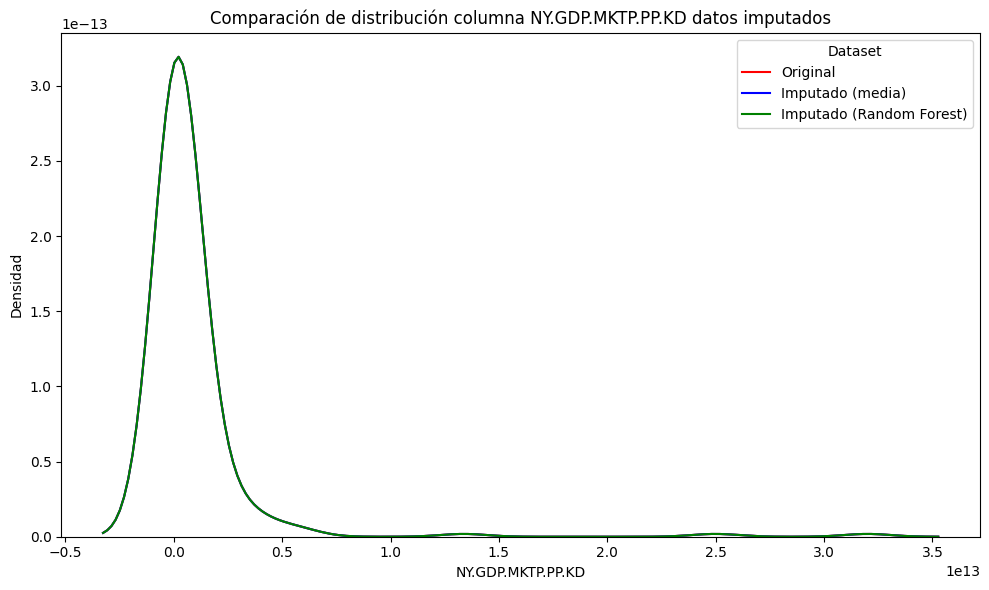

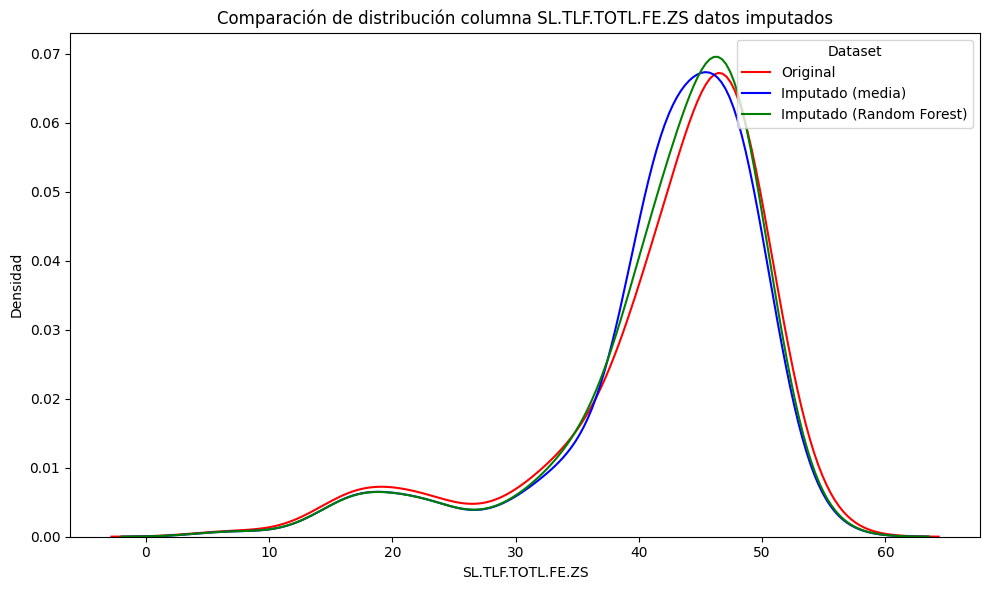

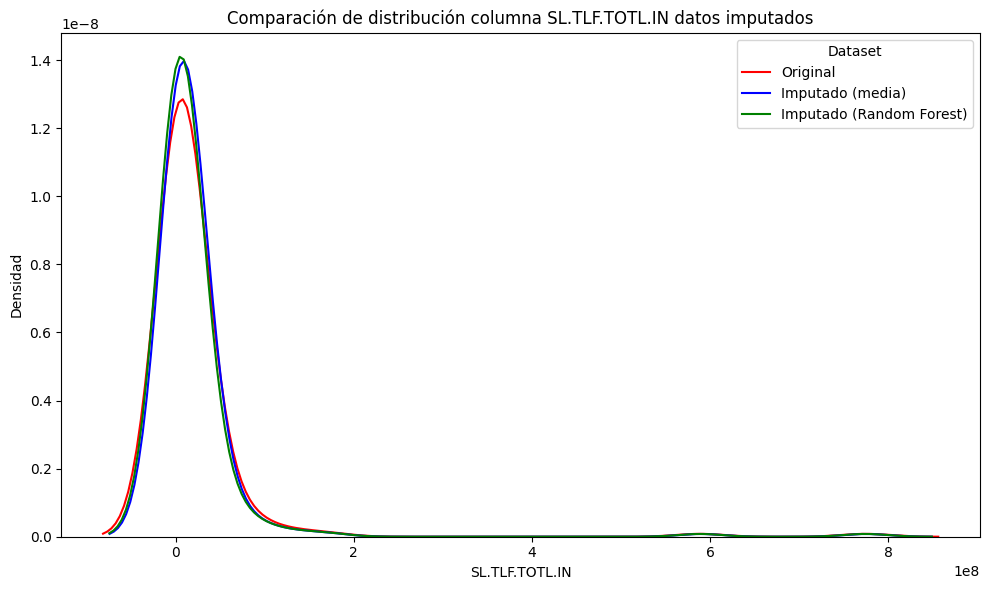

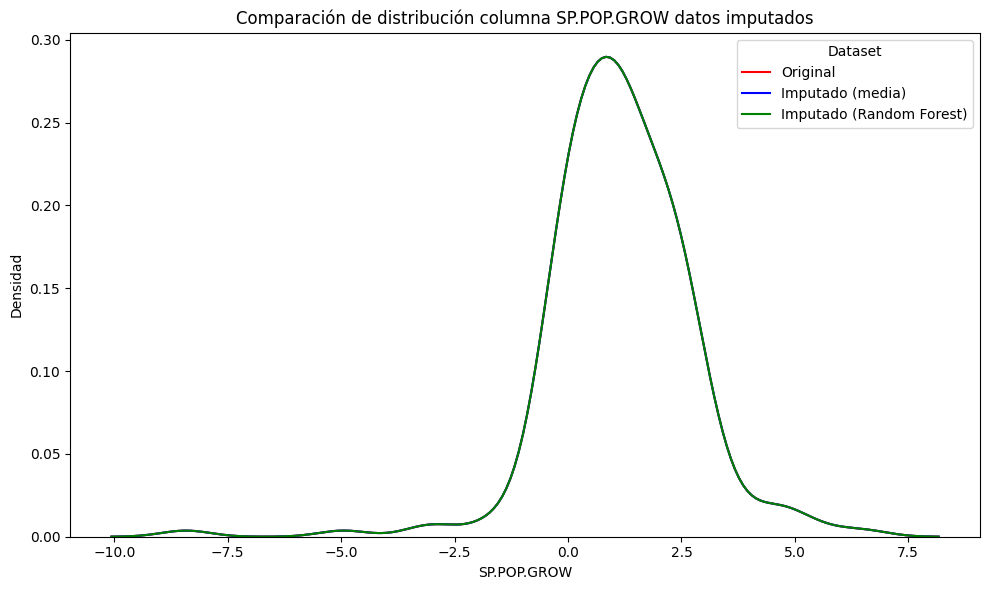

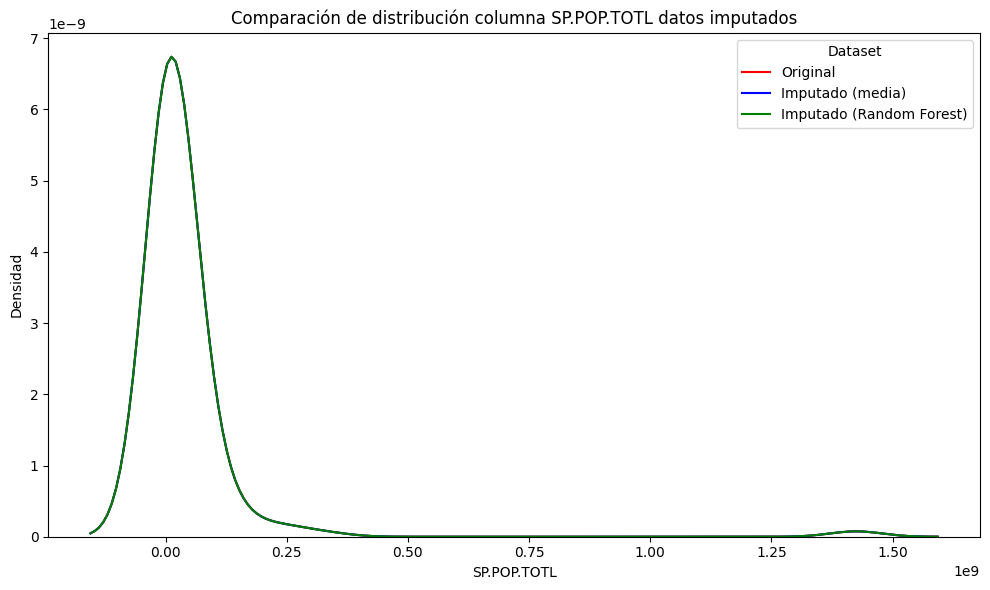

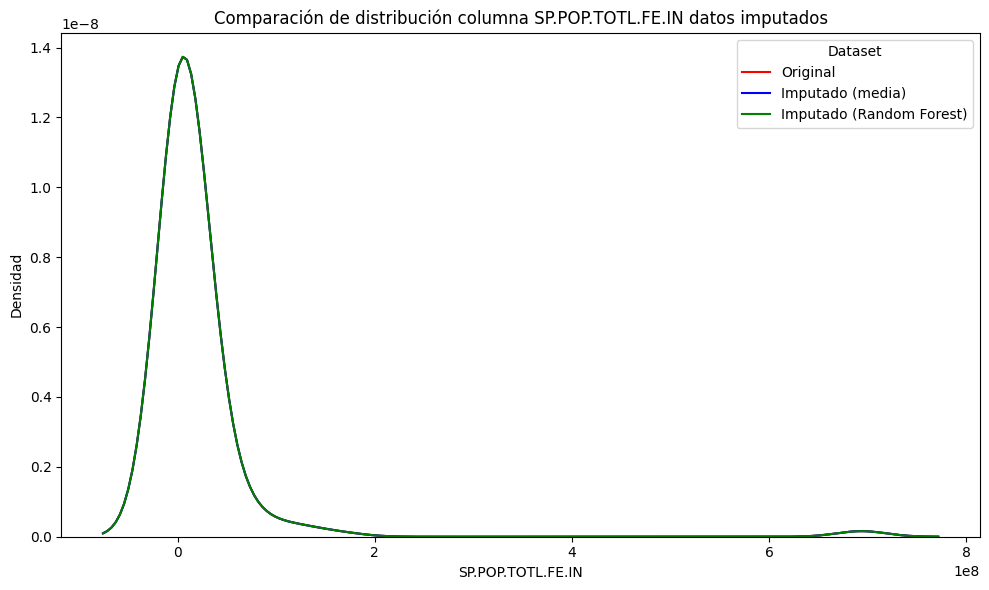

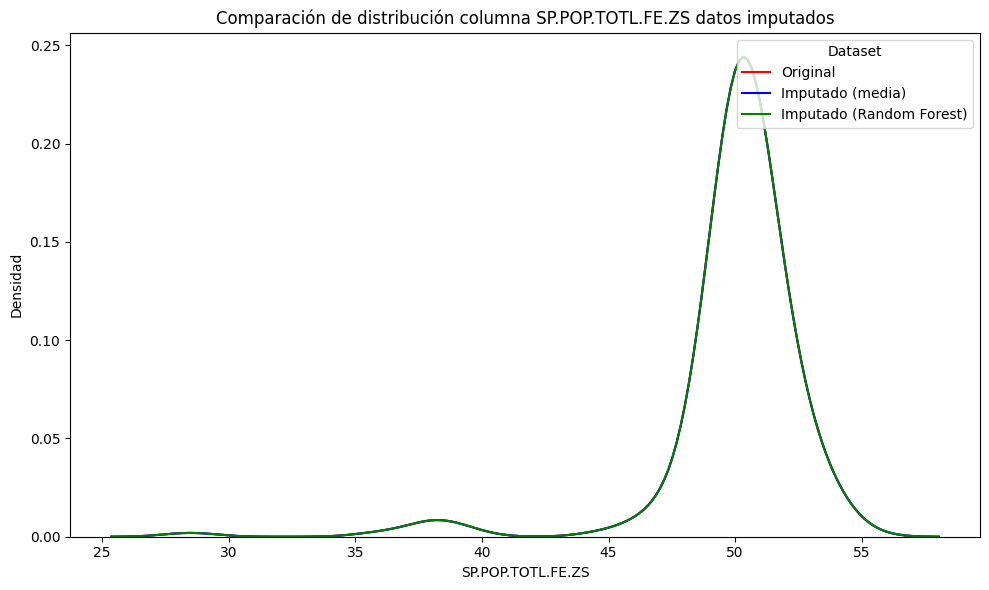

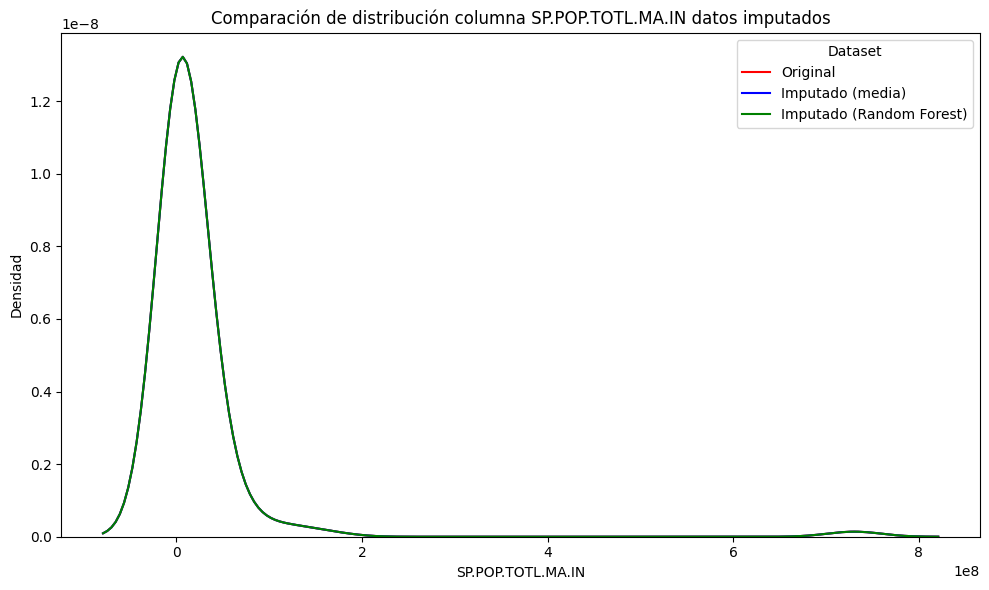

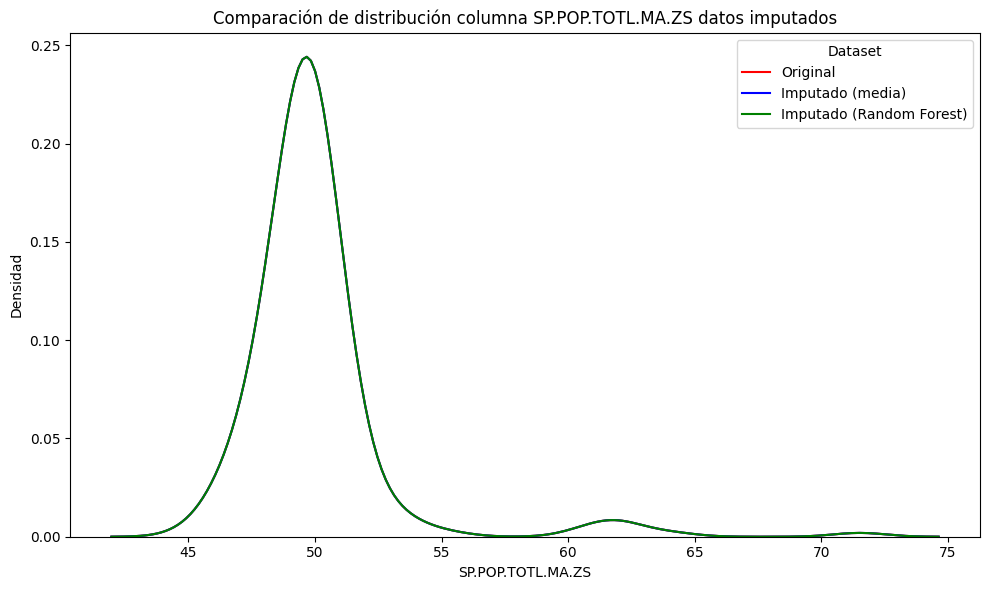

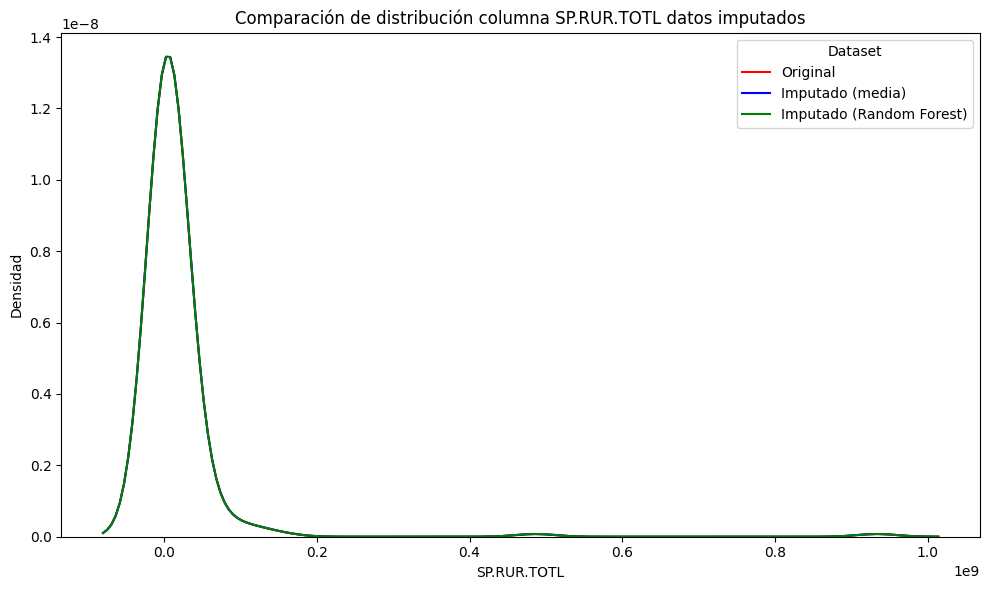

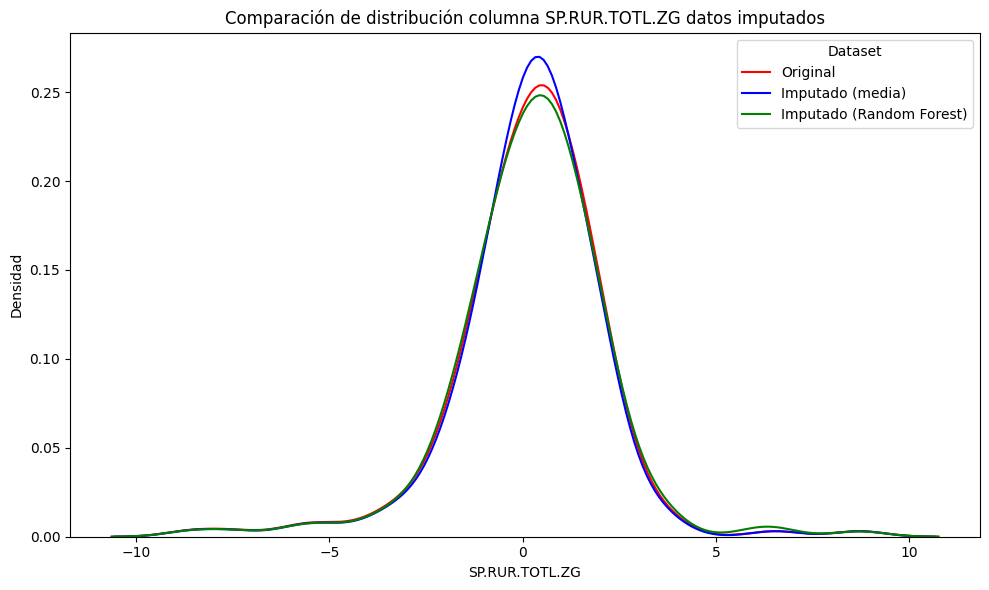

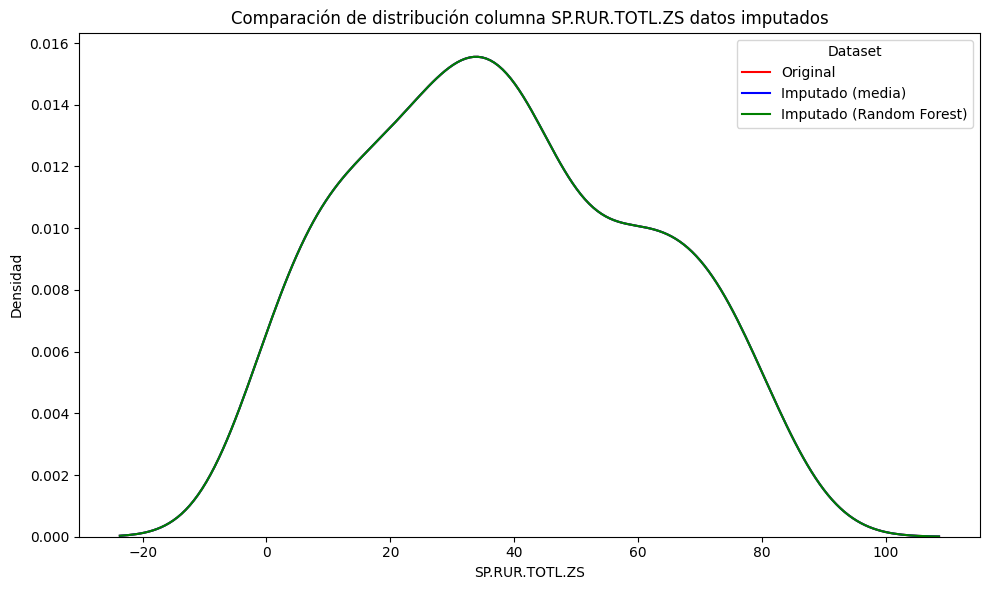

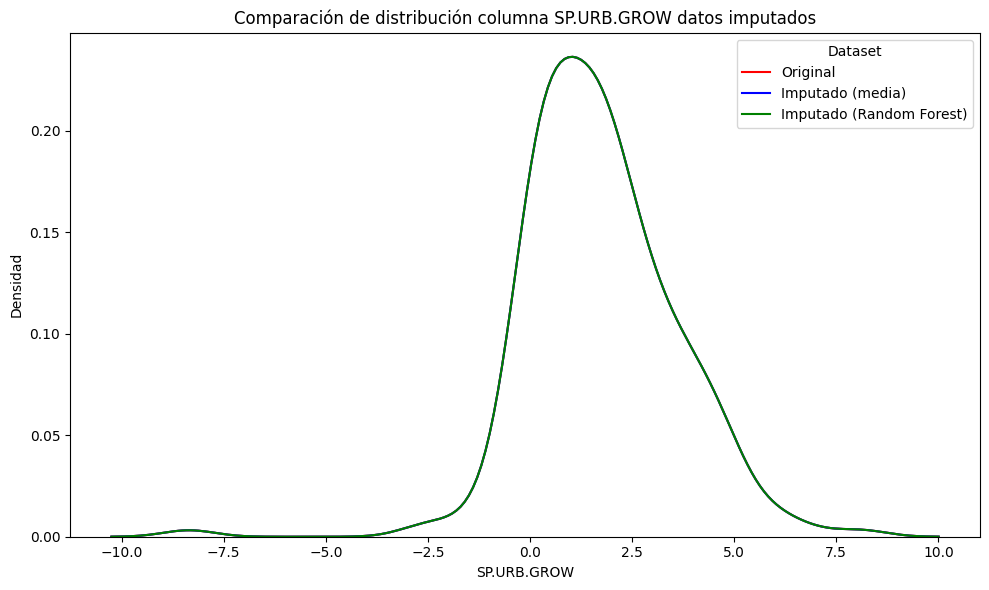

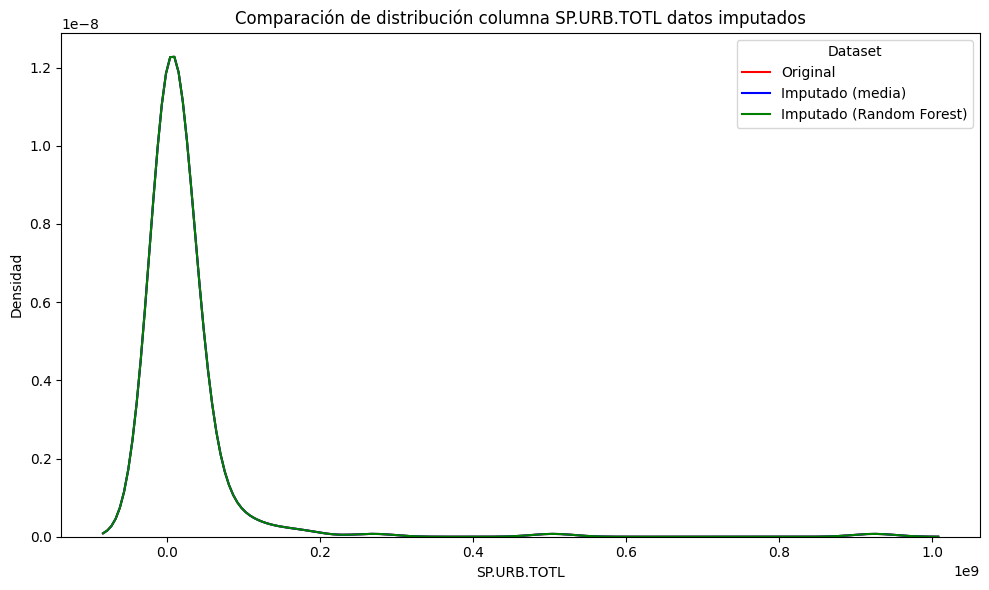

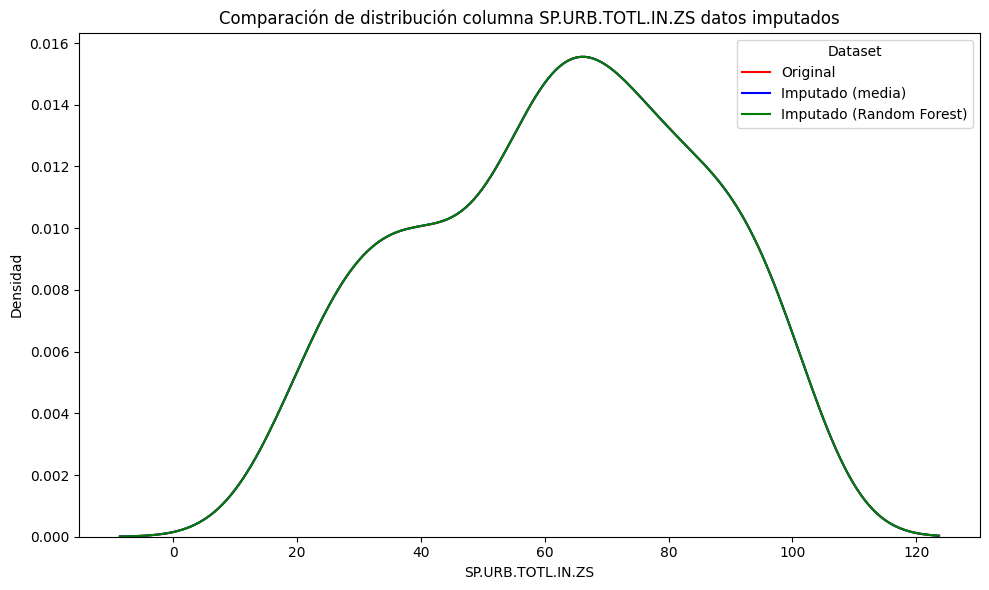

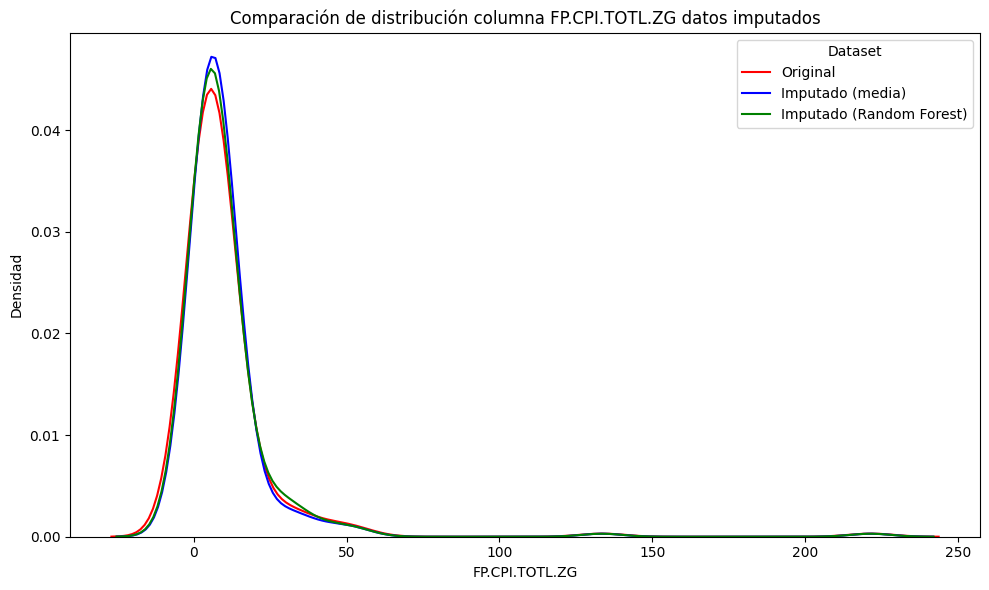

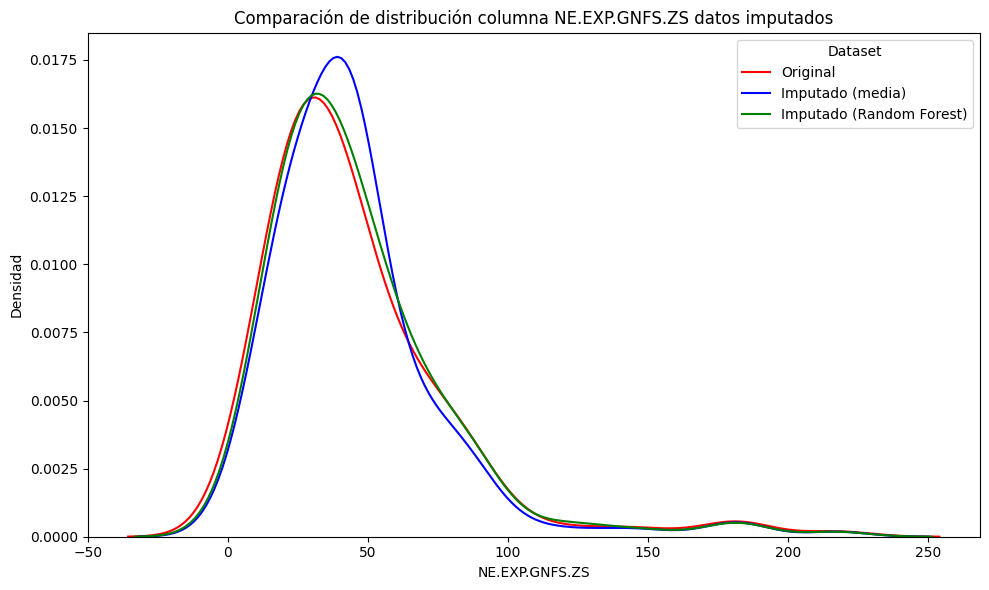

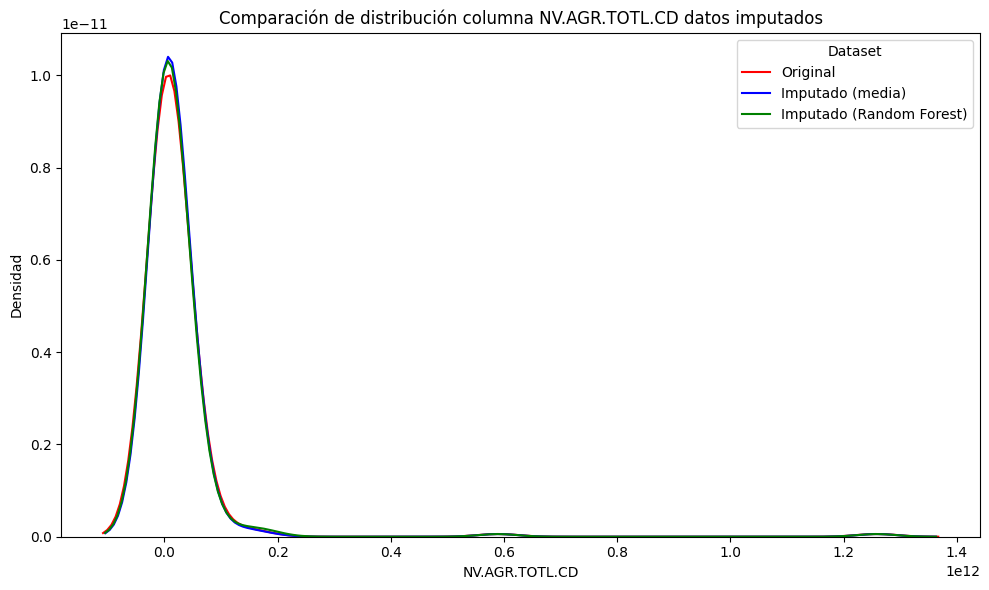

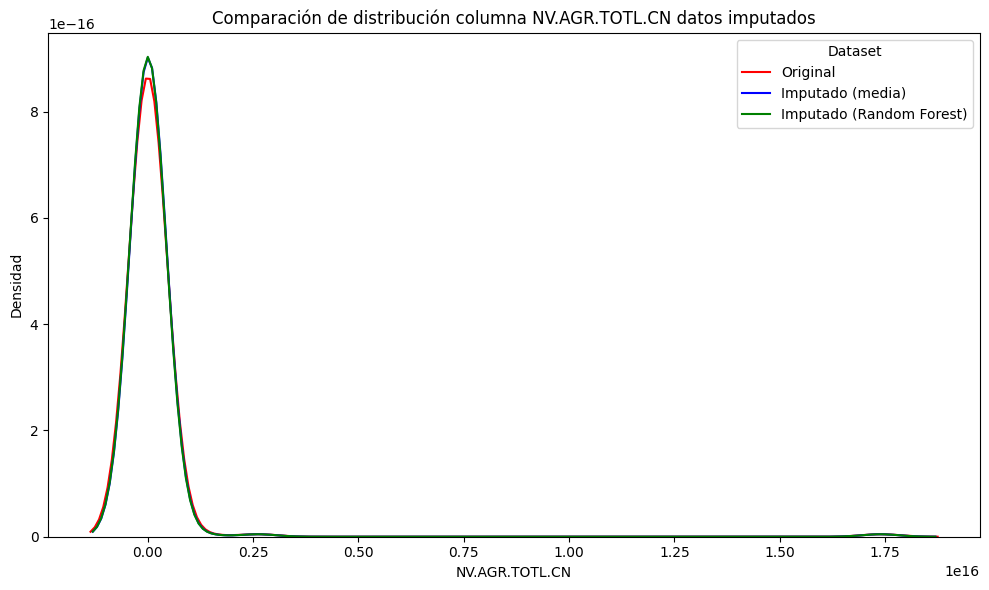

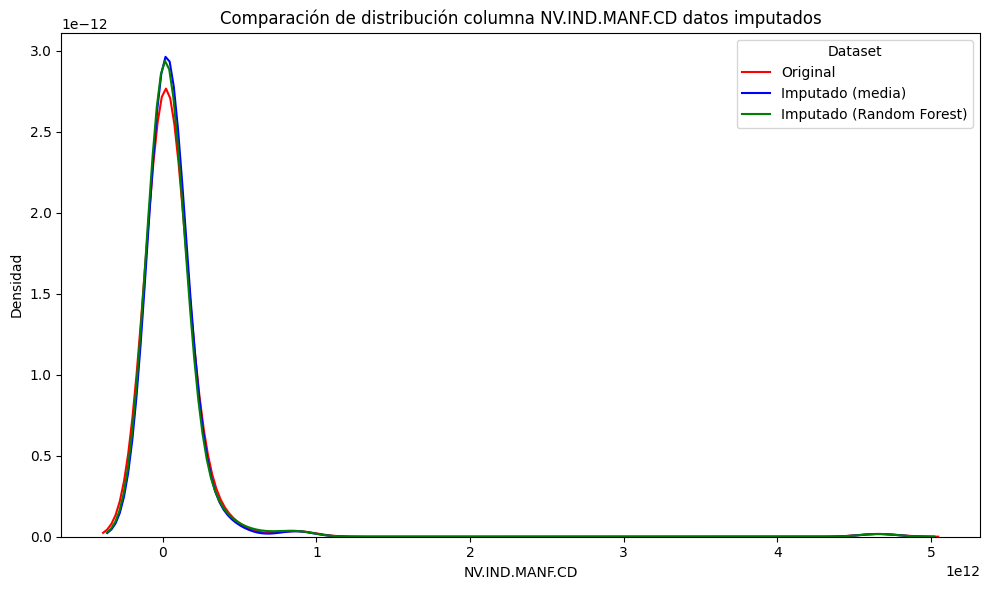

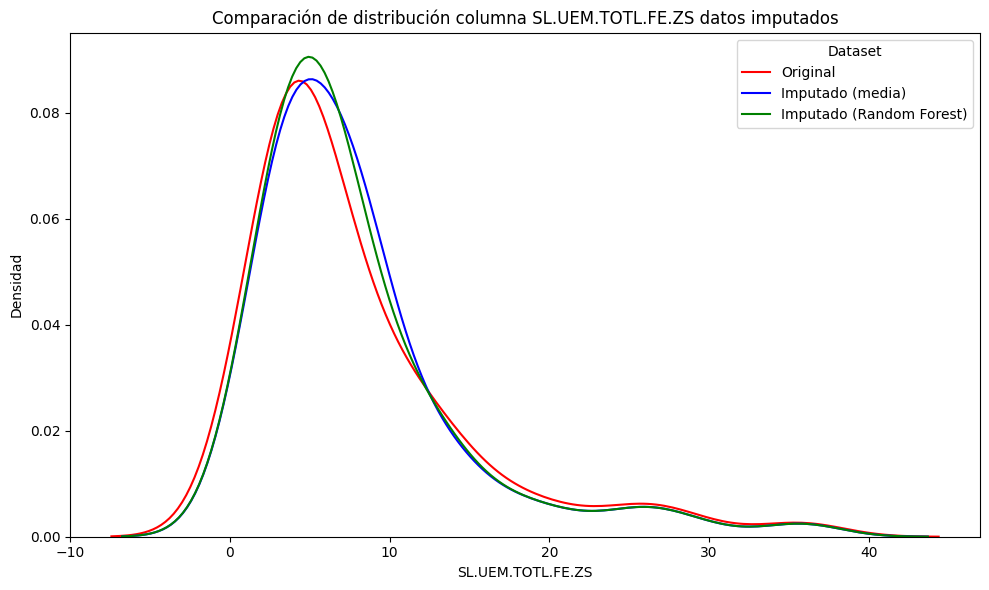

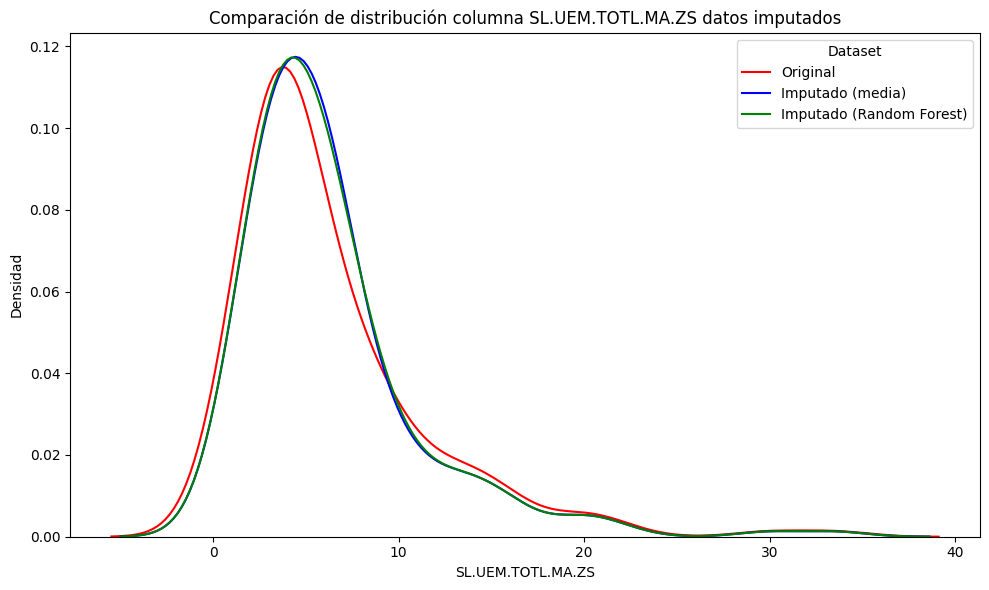

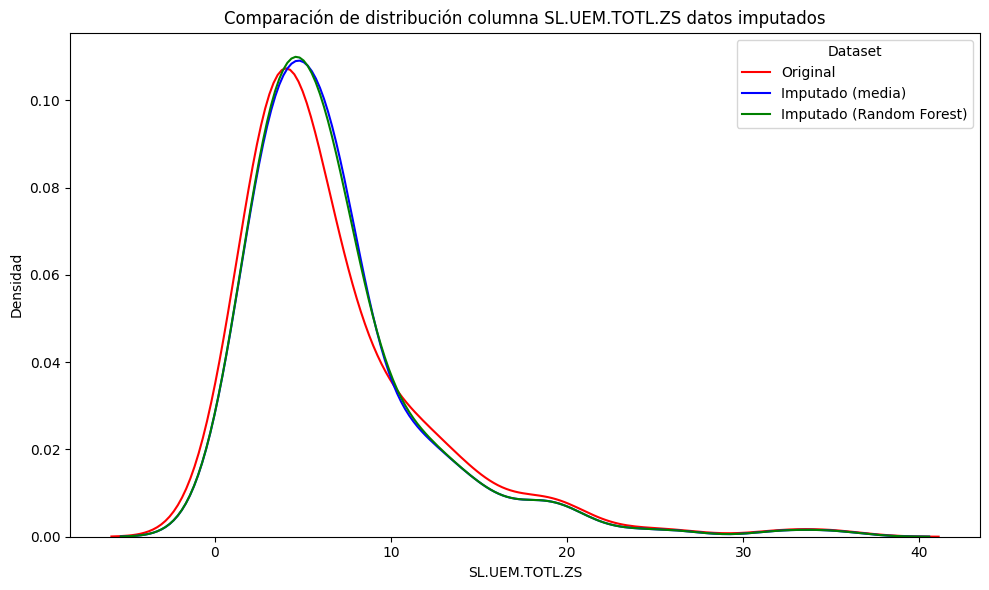

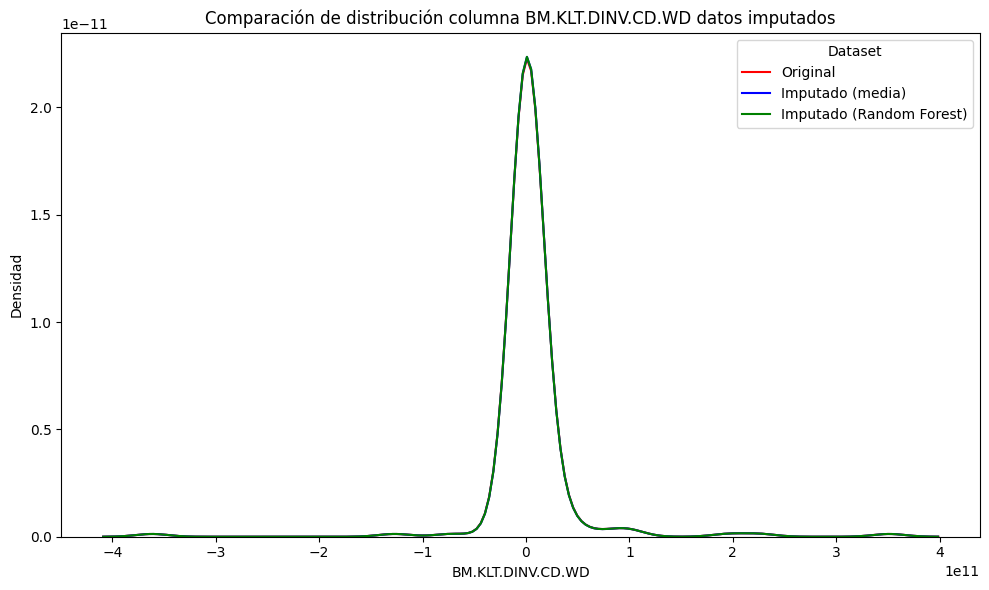

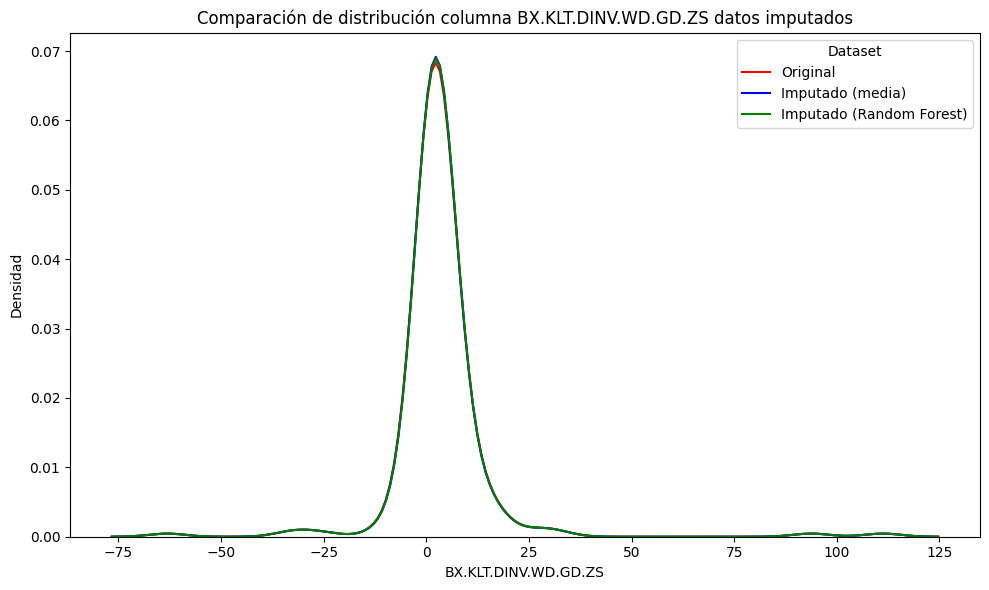

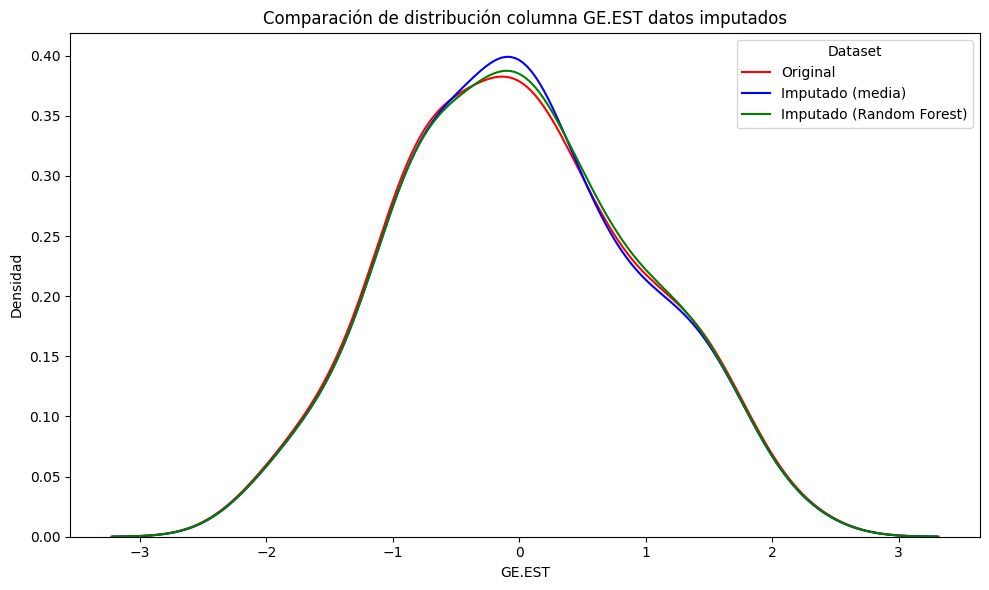

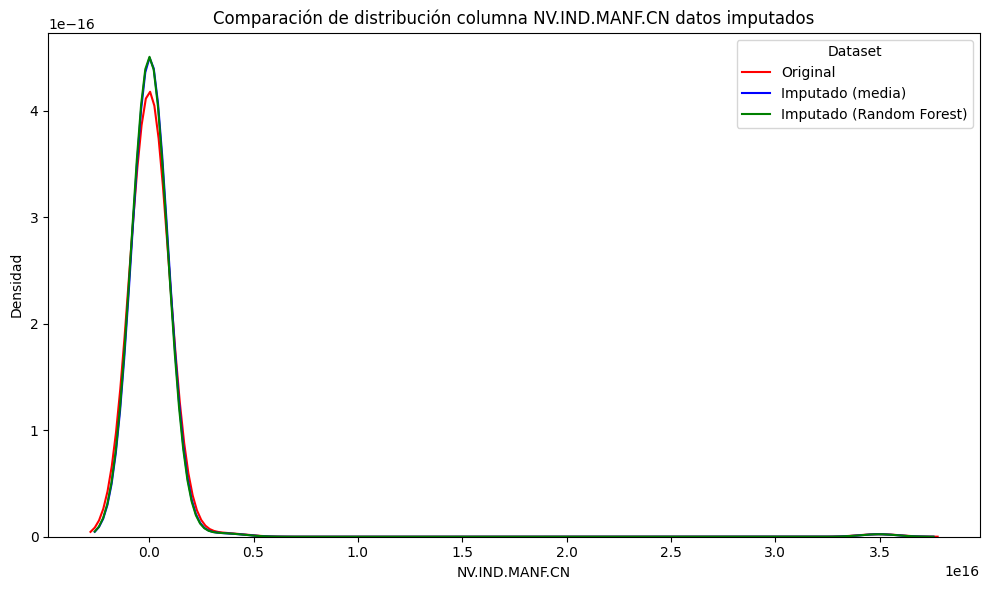

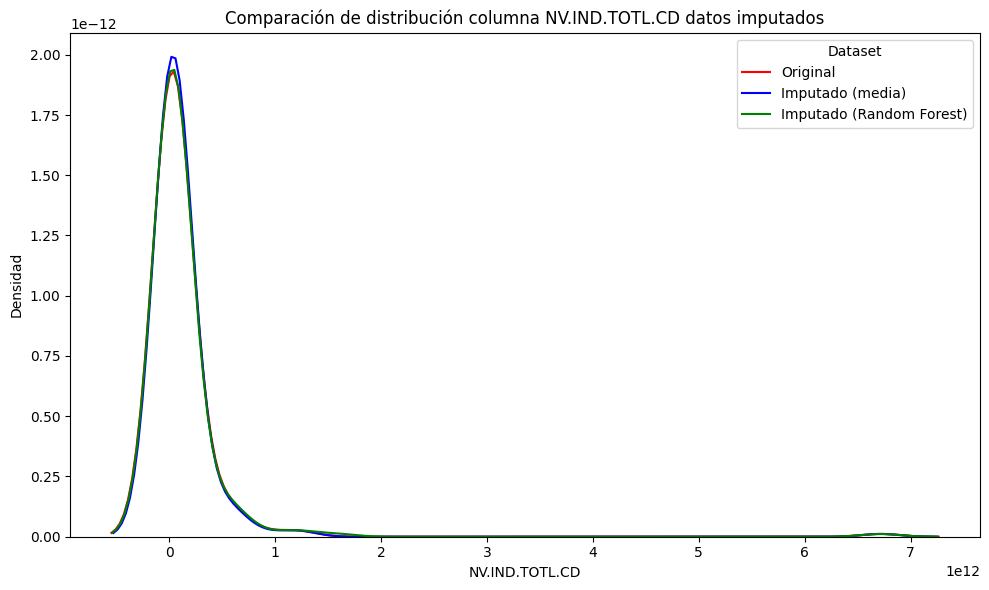

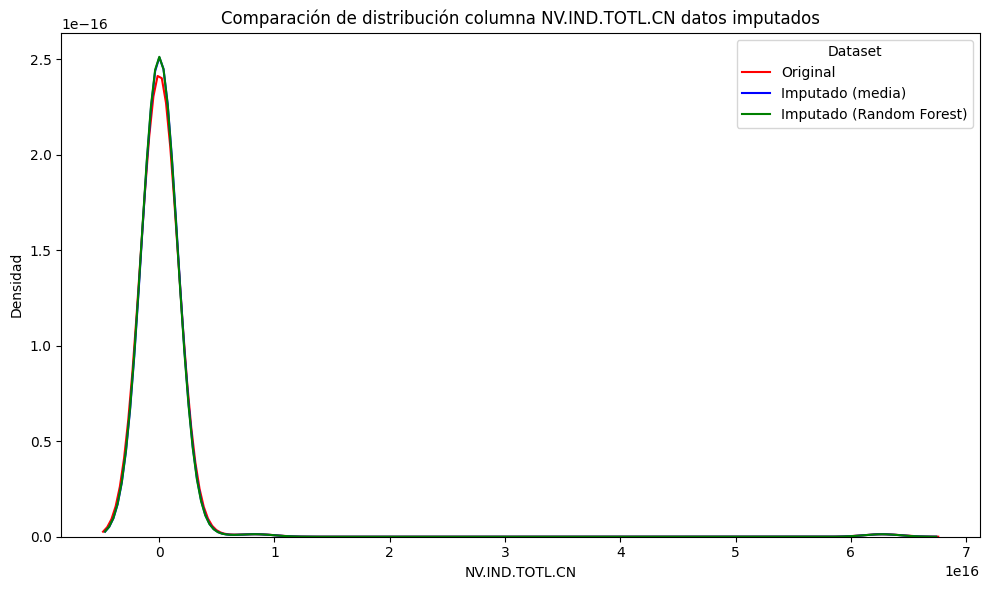

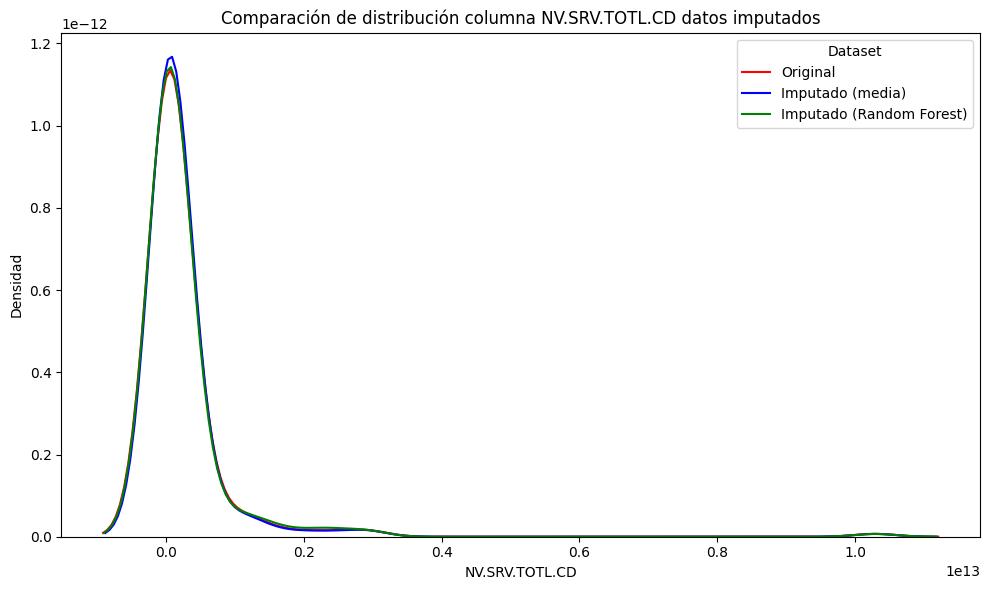

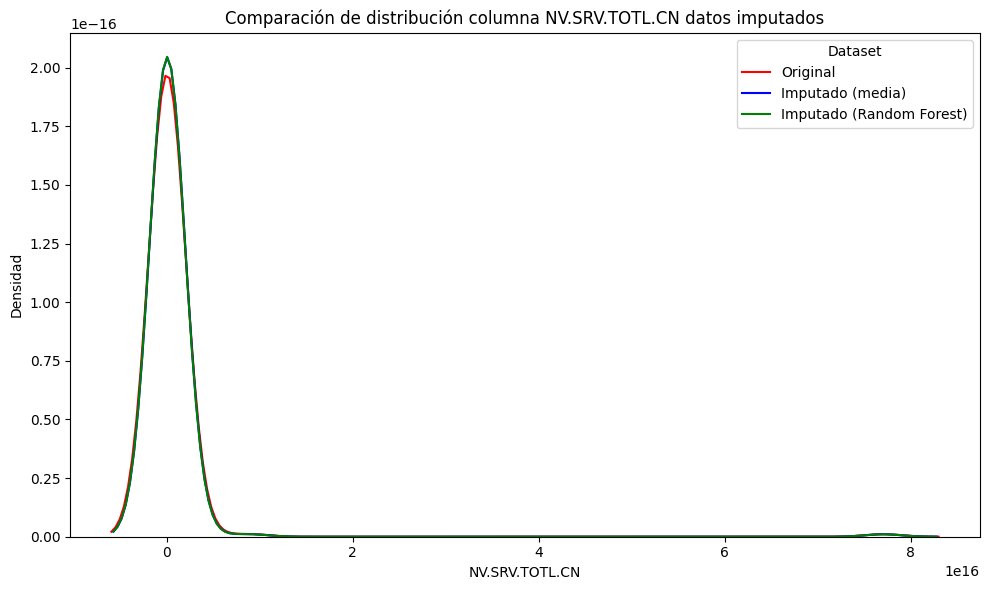

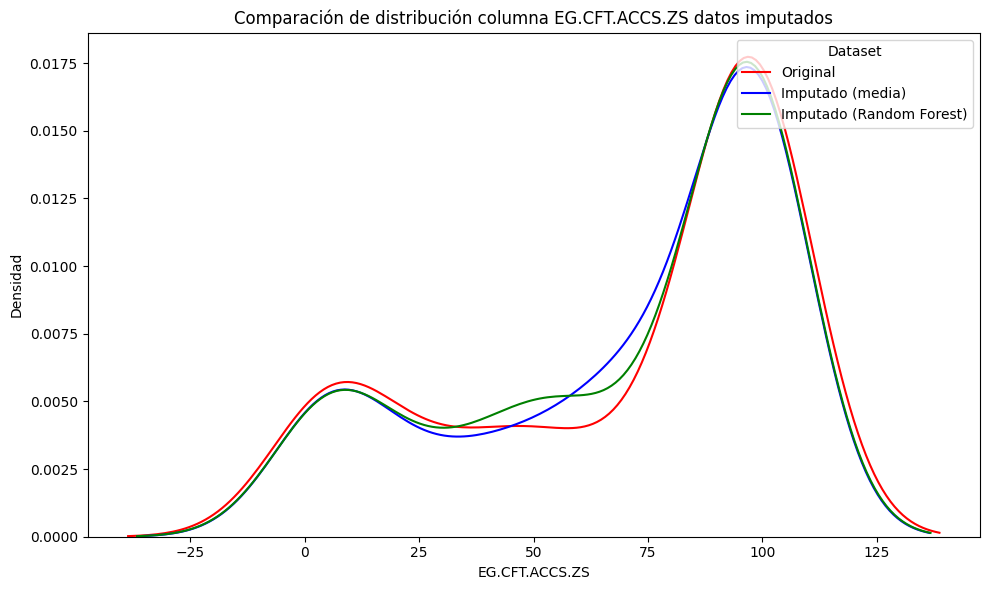

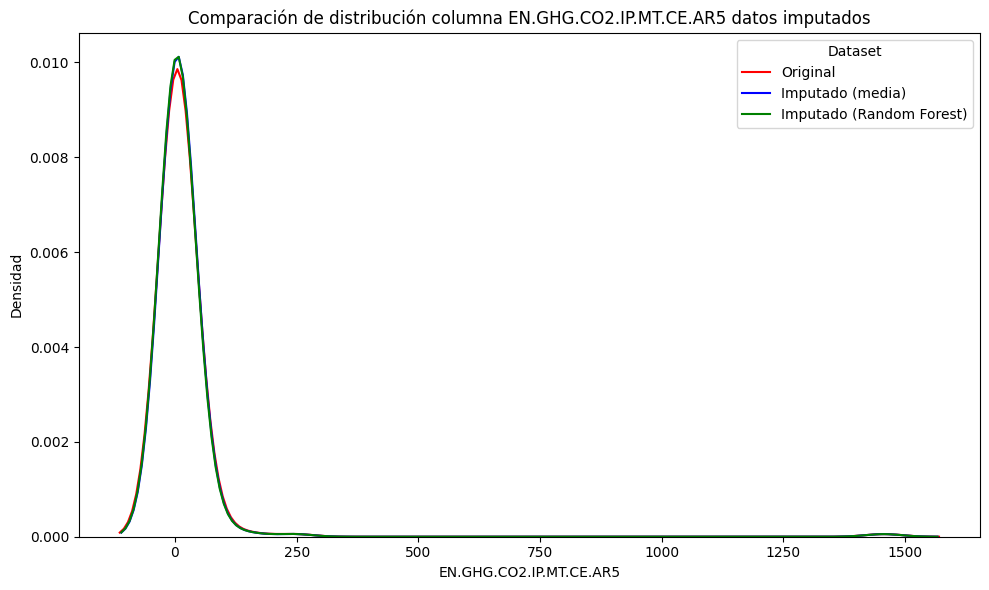

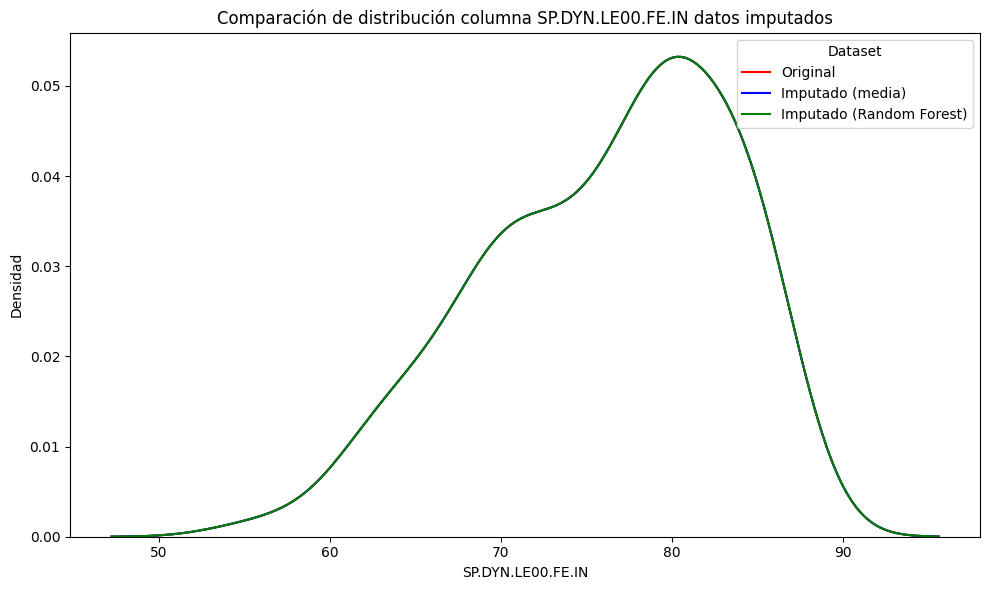

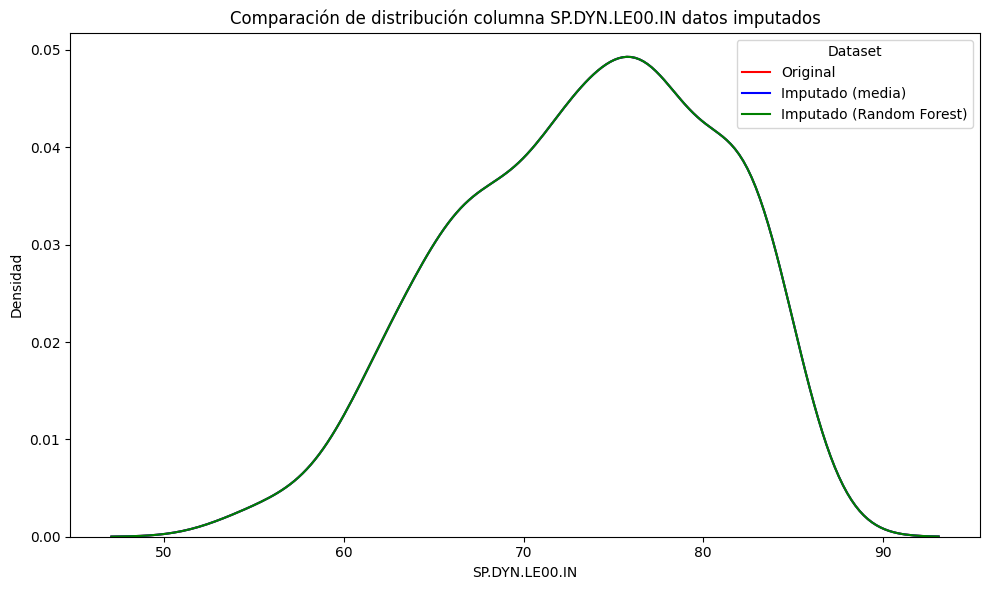

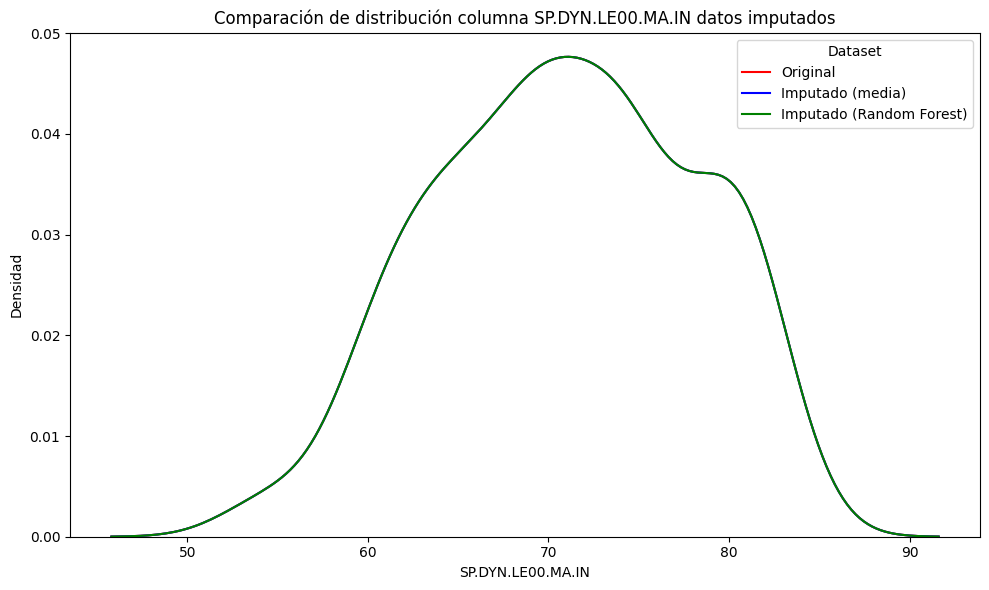

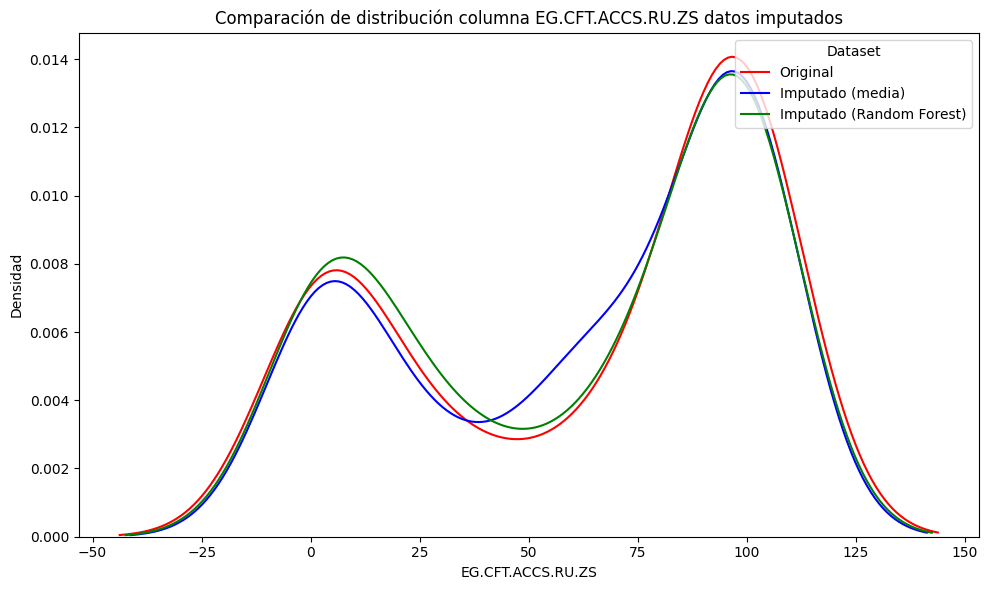

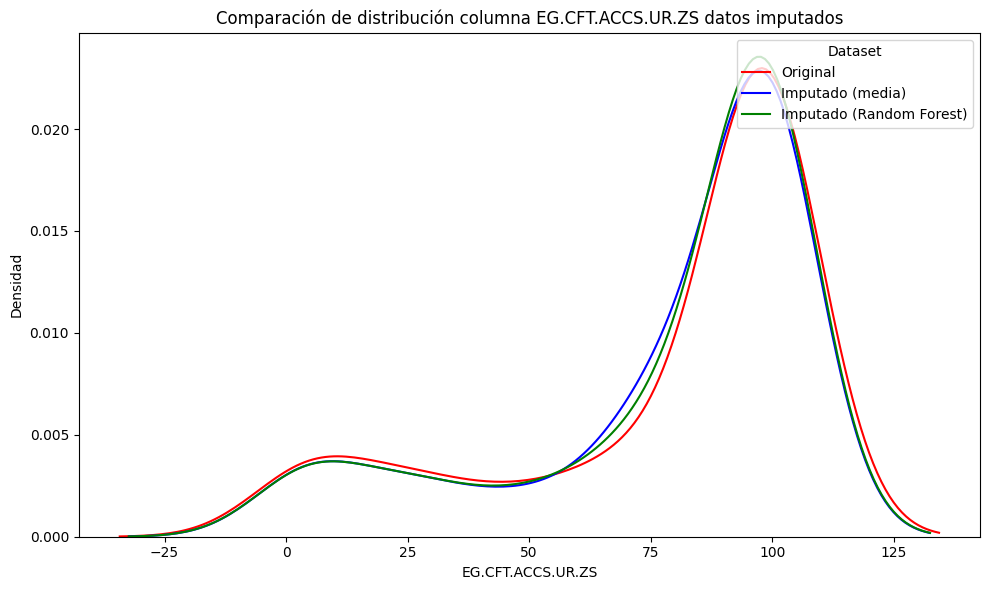

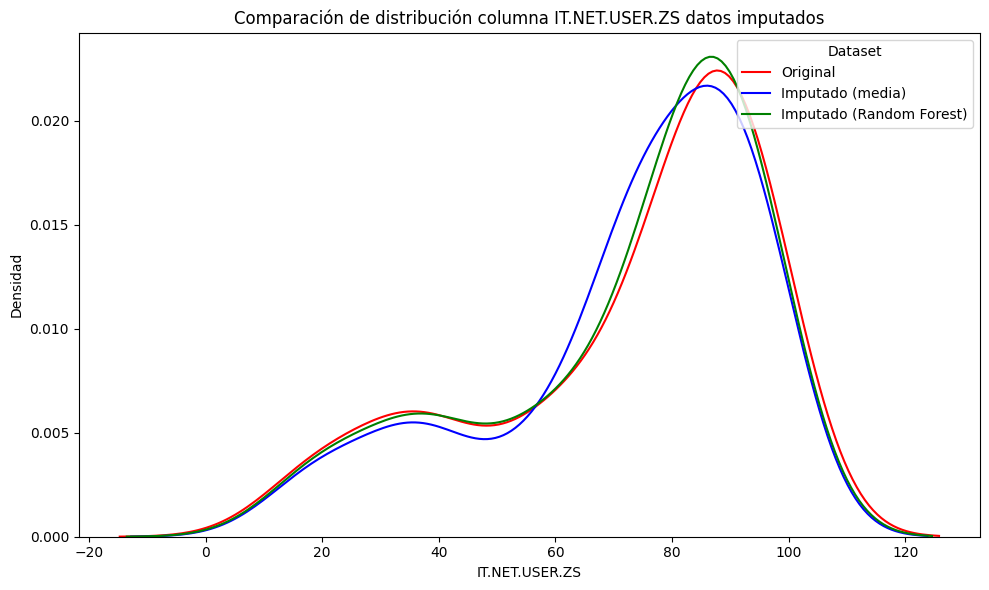

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

columnas = df_wb_limpio.select_dtypes(include='number').columns

for col in columnas:
  plt.figure(figsize=(10, 6))
  sns.kdeplot(data=df_wb_limpio, x= col, label='Original', color='red')
  sns.kdeplot(data=df_wb_media, x=col, label='Imputado (media)', color='blue')
  sns.kdeplot(data=df_randomf, x=col, label='Imputado (Random Forest)', color='green')

  plt.legend(title='Dataset', loc='upper right')
  plt.title(f"Comparación de distribución columna {col} datos imputados")
  plt.xlabel(col)
  plt.ylabel("Densidad")
  plt.tight_layout()
  plt.show()


> Nos quedamos con el modelo random forest ya que es el que mas se aproxima a la Base de datos original.



In [ ]:
df_randomf.describe()

NY.GDP.MKTP.PP.KD  SL.TLF.TOTL.FE.ZS  SL.TLF.TOTL.IN  SP.POP.GROW  \
count       1.980000e+02         198.000000    1.980000e+02   198.000000   
mean        8.388712e+11          42.039815    1.835986e+07     1.152752   
std         3.129922e+12           8.519759    7.166619e+07     1.576210   
min         5.705451e+07           6.846247    3.361400e+04    -8.423008   
25%         2.586691e+10          40.128389    7.131290e+05     0.282878   
50%         8.596764e+10          44.562492    3.175596e+06     1.112108   
75%         4.615291e+11          47.452732    1.069484e+07     2.088224   
max         3.200488e+13          54.670843    7.746076e+08     6.527050   

        SP.POP.TOTL  SP.POP.TOTL.FE.IN  SP.POP.TOTL.FE.ZS  SP.POP.TOTL.MA.IN  \
count  1.980000e+02       1.980000e+02         198.000000       1.980000e+02   
mean   3.999611e+07       1.987776e+07          49.973491       2.011836e+07   
std    1.484957e+08       7.252840e+07           2.993389       7.598056e+07   
min    9.816000e+03       4.795000e+03          28.483741       5.021000e+03   
25%    1.373786e+06       6.876850e+05          49.651875       6.826450e+05   
50%    7.335048e+06       3.672054e+06          50.329281       3.560820e+06   
75%    2.936413e+07       1.403224e+07          51.189445       1.424457e+07   
max    1.438070e+09       6.961863e+08          54.920880       7.418833e+08   

       SP.POP.TOTL.MA.ZS   SP.RUR.TOTL  ...  NV.SRV.TOTL.CD  NV.SRV.TOTL.CN  \
count         198.000000  1.980000e+02  ...    1.980000e+02    1.980000e+02   
mean           50.026509  1.709937e+07  ...    2.489327e+11    5.009523e+14   
std             2.993389  7.663858e+07  ...    8.640029e+11    5.513602e+15   
min            45.079120  0.000000e+00  ...    1.838905e+08    1.838905e+08   
25%            48.810555  4.134135e+05  ...    5.884022e+09    4.676045e+10   
50%            49.670719  1.983892e+06  ...    2.074486e+10    6.449825e+11   
75%            50.348125  1.024225e+07  ...    1.619981e+11    1.017999e+13   
max            71.516259  9.337718e+08  ...    1.029315e+13    7.703243e+16   

       EG.CFT.ACCS.ZS  EN.GHG.CO2.IP.MT.CE.AR5  SP.DYN.LE00.FE.IN  \
count      198.000000               198.000000         198.000000   
mean        69.971187                16.227275          76.119303   
std         35.227745               105.877146           7.221813   
min          0.100000                 0.000000          54.743000   
25%         44.700000                 0.126500          70.733000   
50%         88.300000                 1.279350          77.486500   
75%        100.000000                 4.986950          81.700000   
max        100.000000              1456.092000          88.090000   

       SP.DYN.LE00.IN  SP.DYN.LE00.MA.IN  EG.CFT.ACCS.RU.ZS  \
count      198.000000         198.000000         198.000000   
mean        73.476060          70.910354          60.604040   
std          7.085527           7.104323          40.726646   
min         54.462000          53.195000           0.000000   
25%         67.713000          65.379000          14.287500   
50%         74.292890          70.666000          78.505000   
75%         78.485976          75.803000         100.000000   
max         85.706000          84.206000         100.000000   

       EG.CFT.ACCS.UR.ZS  IT.NET.USER.ZS  
count         198.000000      198.000000  
mean           78.856237       72.205211  
std            31.177606       23.620676  
min             0.100000       11.078400  
25%            72.050000       58.342525  
50%            95.800000       81.271600  
75%           100.000000       89.197700  
max           100.000000      100.000000  

[8 rows x 39 columns]

## Outliers metodo ABOD

In [ ]:
%pip install pyod

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.7/204.7 kB 7.0 MB/s eta 0:00:00


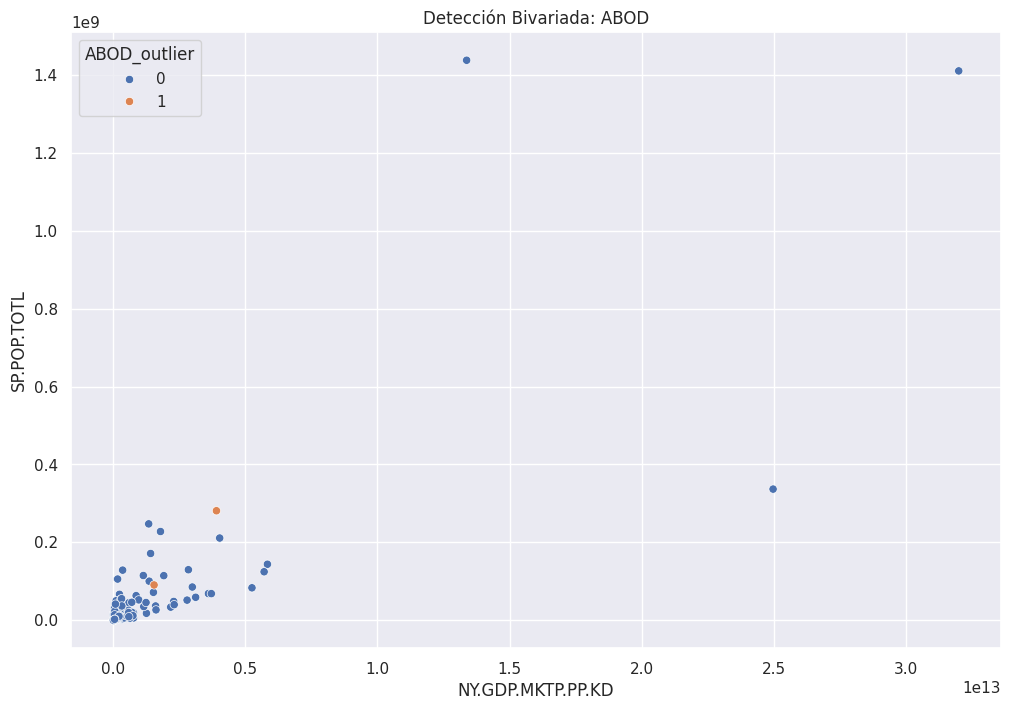

In [ ]:
from pyod.models.abod import ABOD

abod_clf = ABOD(contamination=0.01)

df_a = df_randomf.copy()

numeric_cols = df_a.select_dtypes(include=np.number).columns
abod_clf.fit(df_a[numeric_cols])

df_a['ABOD_outlier'] = abod_clf.labels_

sns.set(rc = {'figure.figsize':(12,8)})
sns.scatterplot(data=df_a, x='NY.GDP.MKTP.PP.KD', y='SP.POP.TOTL', hue='ABOD_outlier')
plt.title('Detección Bivariada: ABOD')
plt.show()

In [ ]:
df_a['ABOD_outlier'].sum()

np.int64(2)

## Estadísticas descriptivas



In [ ]:
df_randomf.describe()

NY.GDP.MKTP.PP.KD  SL.TLF.TOTL.FE.ZS  SL.TLF.TOTL.IN  SP.POP.GROW  \
count       1.980000e+02         198.000000    1.980000e+02   198.000000   
mean        8.388712e+11          42.039815    1.835986e+07     1.152752   
std         3.129922e+12           8.519759    7.166619e+07     1.576210   
min         5.705451e+07           6.846247    3.361400e+04    -8.423008   
25%         2.586691e+10          40.128389    7.131290e+05     0.282878   
50%         8.596764e+10          44.562492    3.175596e+06     1.112108   
75%         4.615291e+11          47.452732    1.069484e+07     2.088224   
max         3.200488e+13          54.670843    7.746076e+08     6.527050   

        SP.POP.TOTL  SP.POP.TOTL.FE.IN  SP.POP.TOTL.FE.ZS  SP.POP.TOTL.MA.IN  \
count  1.980000e+02       1.980000e+02         198.000000       1.980000e+02   
mean   3.999611e+07       1.987776e+07          49.973491       2.011836e+07   
std    1.484957e+08       7.252840e+07           2.993389       7.598056e+07   
min    9.816000e+03       4.795000e+03          28.483741       5.021000e+03   
25%    1.373786e+06       6.876850e+05          49.651875       6.826450e+05   
50%    7.335048e+06       3.672054e+06          50.329281       3.560820e+06   
75%    2.936413e+07       1.403224e+07          51.189445       1.424457e+07   
max    1.438070e+09       6.961863e+08          54.920880       7.418833e+08   

       SP.POP.TOTL.MA.ZS   SP.RUR.TOTL  ...  NV.SRV.TOTL.CD  NV.SRV.TOTL.CN  \
count         198.000000  1.980000e+02  ...    1.980000e+02    1.980000e+02   
mean           50.026509  1.709937e+07  ...    2.489327e+11    5.009523e+14   
std             2.993389  7.663858e+07  ...    8.640029e+11    5.513602e+15   
min            45.079120  0.000000e+00  ...    1.838905e+08    1.838905e+08   
25%            48.810555  4.134135e+05  ...    5.884022e+09    4.676045e+10   
50%            49.670719  1.983892e+06  ...    2.074486e+10    6.449825e+11   
75%            50.348125  1.024225e+07  ...    1.619981e+11    1.017999e+13   
max            71.516259  9.337718e+08  ...    1.029315e+13    7.703243e+16   

       EG.CFT.ACCS.ZS  EN.GHG.CO2.IP.MT.CE.AR5  SP.DYN.LE00.FE.IN  \
count      198.000000               198.000000         198.000000   
mean        69.971187                16.227275          76.119303   
std         35.227745               105.877146           7.221813   
min          0.100000                 0.000000          54.743000   
25%         44.700000                 0.126500          70.733000   
50%         88.300000                 1.279350          77.486500   
75%        100.000000                 4.986950          81.700000   
max        100.000000              1456.092000          88.090000   

       SP.DYN.LE00.IN  SP.DYN.LE00.MA.IN  EG.CFT.ACCS.RU.ZS  \
count      198.000000         198.000000         198.000000   
mean        73.476060          70.910354          60.604040   
std          7.085527           7.104323          40.726646   
min         54.462000          53.195000           0.000000   
25%         67.713000          65.379000          14.287500   
50%         74.292890          70.666000          78.505000   
75%         78.485976          75.803000         100.000000   
max         85.706000          84.206000         100.000000   

       EG.CFT.ACCS.UR.ZS  IT.NET.USER.ZS  
count         198.000000      198.000000  
mean           78.856237       72.205211  
std            31.177606       23.620676  
min             0.100000       11.078400  
25%            72.050000       58.342525  
50%            95.800000       81.271600  
75%           100.000000       89.197700  
max           100.000000      100.000000  

[8 rows x 39 columns]

## Distribución y Mapa del PIB



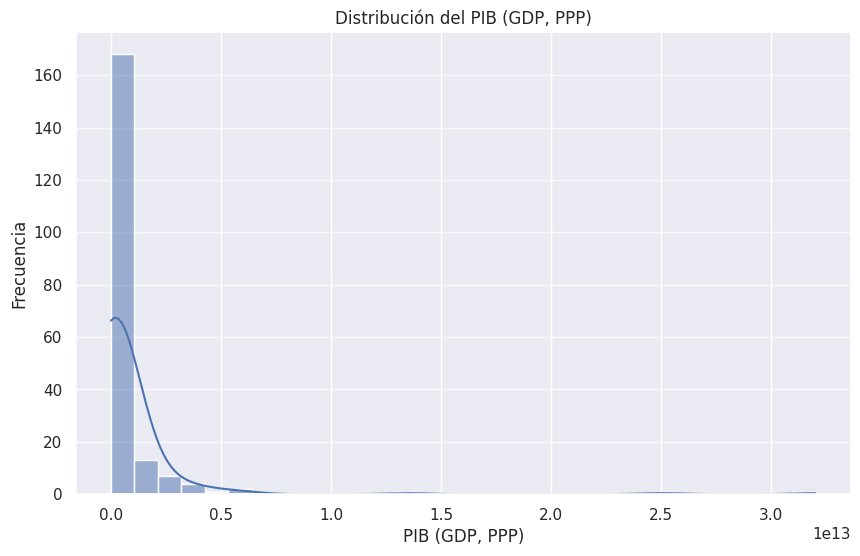

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df_randomf['NY.GDP.MKTP.PP.KD'], bins=30, kde=True)
plt.title('Distribución del PIB (GDP, PPP)')
plt.xlabel('PIB (GDP, PPP)')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.show()

## Discrezar la variable objetivo

In [ ]:
df_wb_raw['NY.GDP.MKTP.PP.KD_discretized'] = pd.qcut(df_wb_raw['NY.GDP.MKTP.PP.KD'], q=5, labels=['Low', 'Medium-Low', 'Medium', 'Medium-High', 'High'])
# Mostrar las primeras filas con la nueva columna discretizada
print(df_wb_raw[['Country', 'NY.GDP.MKTP.PP.KD', 'NY.GDP.MKTP.PP.KD_discretized']].head())

              Country  NY.GDP.MKTP.PP.KD NY.GDP.MKTP.PP.KD_discretized
0            Zimbabwe       8.526678e+10                        Medium
1              Zambia       7.612916e+10                        Medium
2  West Bank and Gaza       2.769440e+10                    Medium-Low
3            Viet Nam       1.359364e+12                          High
4             Vanuatu       1.030020e+09                           Low


# Etapa 2: Reducción de Dimensionalidad con PCA

In [ ]:
y = df_randomf['NY.GDP.MKTP.PP.KD']
x = df_randomf.drop(columns='NY.GDP.MKTP.PP.KD')

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_std = scaler.fit_transform(x)
x_std = pd.DataFrame(x_std, columns=x.columns)

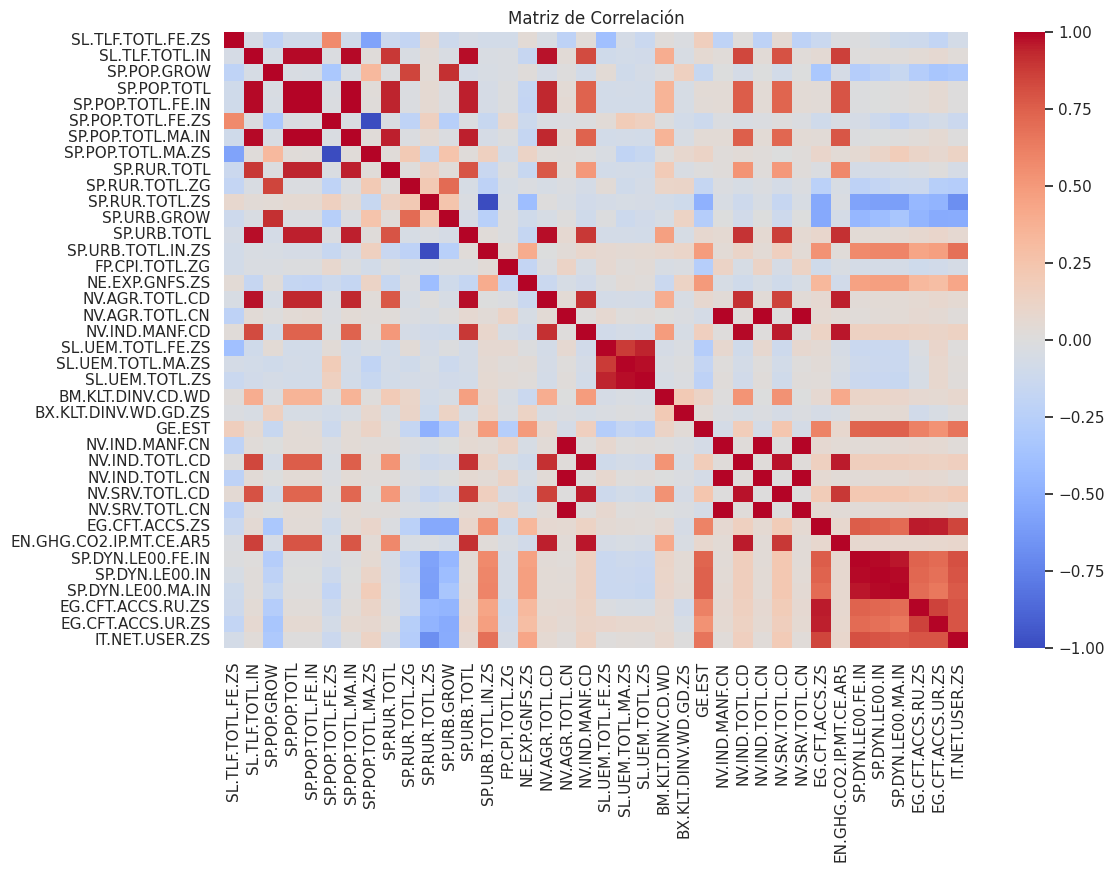

In [ ]:
import matplotlib.pyplot as plt

corr = x_std.corr()
sns.heatmap(corr, cmap='coolwarm', annot=False )
plt.title("Matriz de Correlación")
plt.show()

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x_std)

pca.explained_variance_ratio_

array([2.66298402e-01, 2.09393438e-01, 1.09297570e-01, 9.06184302e-02,
       7.55099481e-02, 4.58031587e-02, 3.49997983e-02, 3.05220156e-02,
       2.82114884e-02, 2.64965719e-02, 1.89798801e-02, 1.52236653e-02,
       1.28596355e-02, 1.15722494e-02, 6.50443327e-03, 4.78964766e-03,
       3.64093475e-03, 3.12690516e-03, 2.11892028e-03, 1.33220951e-03,
       8.44639754e-04, 5.99889989e-04, 5.10733572e-04, 2.21262176e-04,
       1.77434978e-04, 1.43633441e-04, 8.41823589e-05, 6.66459715e-05,
       2.67049157e-05, 1.56699328e-05, 4.35656891e-06, 2.33431939e-06,
       2.18902447e-06, 1.02020608e-06, 6.83731384e-31, 1.31901550e-33,
       1.31901550e-33, 1.29525128e-33])

In [ ]:
np.sum(pca.explained_variance_ratio_[:5])

np.float64(0.7511177890726131)

In [ ]:
# Seleccionar 2 componentes
pca_2 = PCA(n_components=5)
data_pca = pca_2.fit_transform(x_std)

df_pca = pd.DataFrame(data_pca, columns=['CP1', 'CP2','CP3','CP4','CP5'])
df_pca.head()

CP1       CP2       CP3       CP4       CP5
0 -1.815089 -3.644380 -0.145694 -1.154715 -0.165492
1 -1.834548 -3.762430 -0.230295  0.854099 -0.343465
2 -1.231055 -1.263561  0.043136 -0.082035  0.650257
3  1.234612  0.331905  1.001307  0.279644 -2.165059
4 -1.645341 -2.729969 -0.235013  0.889173 -0.793582

In [ ]:
# Matriz de correlación de las componentes
df_pca.corr()

CP1           CP2           CP3           CP4           CP5
CP1  1.000000e+00 -2.094593e-16  8.787506e-17  9.052360e-17  3.221633e-16
CP2 -2.094593e-16  1.000000e+00 -3.940543e-16  3.882038e-16  3.623724e-16
CP3  8.787506e-17 -3.940543e-16  1.000000e+00 -5.592675e-16 -4.327014e-16
CP4  9.052360e-17  3.882038e-16 -5.592675e-16  1.000000e+00  8.134220e-17
CP5  3.221633e-16  3.623724e-16 -4.327014e-16  8.134220e-17  1.000000e+00

Dado que el dataset original cuenta con múltiples variables macroeconómicas y sociales que presentan una alta correlación entre sí, se aplicó la técnica de Análisis de Componentes Principales. El objetivo fue reducir la dimensionalidad de los datos, conservando la mayor cantidad de información posible y eliminando el ruido.

# Etapa 3: Modelación mediante algoritmos de clasificación

## KNN (K-Neighbors Nearest) sin PCA

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, ConfusionMatrixDisplay, cohen_kappa_score
from IPython import display
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

In [ ]:
#@title Función para generar métricas
def fn_metricas_clasificacion(y_true, y_pred):
  print('Accuracy     : %.3f' % accuracy_score(y_true, y_pred))
  print("Precisión    : {}".format(precision_score(y_true, y_pred, average='weighted')))
  print("Recall       : {}".format(recall_score(y_true, y_pred, average='weighted')))
  print("Puntuación F1: {}".format(f1_score(y_true, y_pred, average='weighted')))
  print("Cohen Kappa  : {}".format(cohen_kappa_score(y_true, y_pred)))

In [ ]:
#@title Crear función para visualizar métricas
def fn_metricas_info(modelo, y_verdadero, y_calculado):
    metrics = {
        'Accuracy': "%.5f" % accuracy_score(y_verdadero, y_calculado),
        'Precisión': "{}".format(precision_score(y_verdadero, y_calculado, average=None)),
        'Recall': "{}".format(recall_score(y_verdadero, y_calculado, average=None)),
        'Puntuación F1': "{}".format(f1_score(y_verdadero, y_calculado, average=None)),
        'Cohen Kappa': "{}".format(cohen_kappa_score(y_verdadero, y_calculado))
    }
    return pd.DataFrame(metrics, index=[modelo])

In [ ]:
#@title Particionar set de datos
X_original = df_randomf.drop(columns = ['NY.GDP.MKTP.PP.KD', 'NY.GDP.MKTP.PP.KD_discretized'])
y_original = df_randomf['NY.GDP.MKTP.PP.KD_discretized']

In [ ]:
X_train, X_test, y_train, y_test =train_test_split(X_original, y_original, test_size=0.2, random_state=0, stratify=y_original)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

In [ ]:
 #kfold = StratifiedKFold(n_splits=5, shuffle = True, random_state=2025)
from sklearn.model_selection import KFold
knn = KNeighborsClassifier(n_neighbors=5)
kfold = KFold(n_splits=5, shuffle = True, random_state=2025)

In [ ]:
# Realizar modelo KNN
cv = cross_val_score(knn,X_original, y_original, cv = kfold, scoring = 'accuracy')

In [ ]:
print(f"Media Accuray: {cv.mean()}")

Media Accuray: 0.45961538461538465


In [ ]:
print(f"Std Accuray: {cv.std()}")

Std Accuray: 0.12883626700171635


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
X_original2 = df_randomf.drop(columns = ['NY.GDP.MKTP.PP.KD', 'NY.GDP.MKTP.PP.KD_discretized'])
y_original2 = df_randomf['NY.GDP.MKTP.PP.KD_discretized']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_original2, y_original2, train_size = 0.8, random_state =2025)

In [ ]:
knn_clf = KNeighborsClassifier()
# Aplicar modelo a datos de entrenamietno
knn_classifier = knn_clf.fit(X_train, y_train)

In [ ]:
y_pred_knn = knn_classifier.predict(X_test)

In [ ]:
pd.concat([pd.DataFrame(y_pred_knn.T), pd.DataFrame(y_test.T).reset_index(drop=True)], axis = 1 )

0 NY.GDP.MKTP.PP.KD_discretized
0           Low                           Low
1        Medium                        Medium
2          High                   Medium-High
3   Medium-High                          High
4          High                   Medium-High
5        Medium                    Medium-Low
6          High                          High
7        Medium                        Medium
8        Medium                        Medium
9        Medium                    Medium-Low
10  Medium-High                    Medium-Low
11   Medium-Low                           Low
12         High                        Medium
13         High                          High
14          Low                           Low
15  Medium-High                   Medium-High
16   Medium-Low                           Low
17          Low                           Low
18         High                        Medium
19       Medium                        Medium
20       Medium                        Medium
21          Low                           Low
22         High                          High
23  Medium-High                   Medium-High
24       Medium                        Medium
25   Medium-Low                   Medium-High
26  Medium-High                   Medium-High
27         High                   Medium-High
28  Medium-High                   Medium-High
29          Low                           Low
30  Medium-High                          High
31          Low                           Low
32          Low                           Low
33       Medium                        Medium
34   Medium-Low                    Medium-Low
35   Medium-Low                    Medium-Low
36          Low                           Low
37  Medium-High                   Medium-High
38         High                          High
39          Low                           Low

In [ ]:
confusion_matrix(y_test, y_pred_knn)

array([[4, 0, 0, 2, 0],
       [0, 9, 0, 0, 2],
       [2, 0, 7, 0, 0],
       [3, 0, 0, 5, 1],
       [0, 0, 2, 1, 2]])

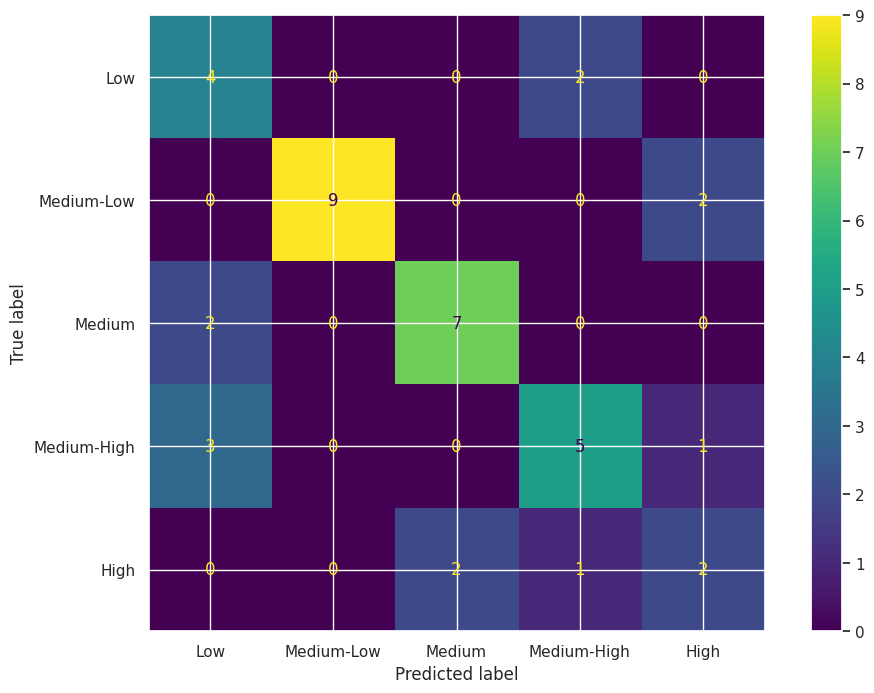

In [ ]:
cm = confusion_matrix(y_true=y_test, y_pred=y_pred_knn)
cm_display = ConfusionMatrixDisplay(cm, display_labels=y_test.cat.categories).plot()

In [ ]:
fn_metricas_clasificacion(y_test, y_pred_knn)

Accuracy     : 0.675
Precisión    : 0.7072916666666667
Recall       : 0.675
Puntuación F1: 0.6848529411764706
Cohen Kappa  : 0.5902285263987392


In [ ]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

        High       0.44      0.67      0.53         6
         Low       1.00      0.82      0.90        11
      Medium       0.78      0.78      0.78         9
 Medium-High       0.62      0.56      0.59         9
  Medium-Low       0.40      0.40      0.40         5

    accuracy                           0.68        40
   macro avg       0.65      0.64      0.64        40
weighted avg       0.71      0.68      0.68        40



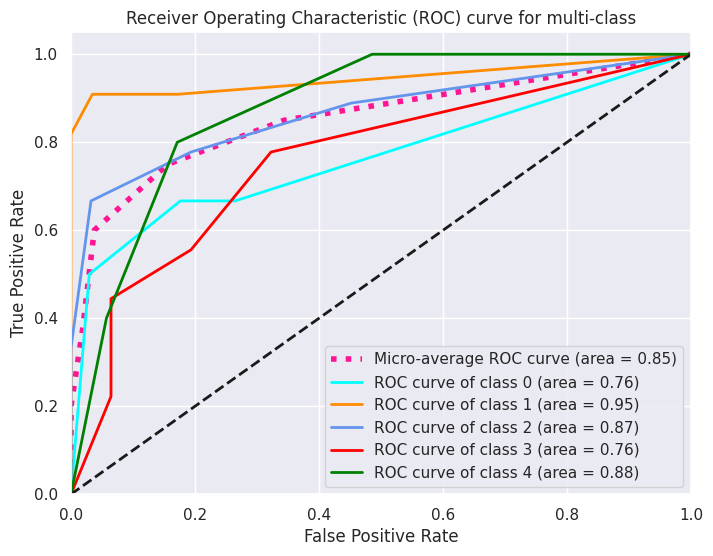

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
import matplotlib.pyplot as plt

# Asume que y_test son las etiquetas verdaderas y y_score son las probabilidades predichas por tu modelo
# para cada clase (output de model.predict_proba(X_test))

# Generar las probabilidades predichas para cada clase
y_score = knn_classifier.predict_proba(X_test)

n_classes = len(np.unique(y_test)) # Número de clases

# Binarizar las etiquetas de salida para la estrategia OvR
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))

# Calcular la curva ROC y el área AUC para cada clase (OvR)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Calcular la curva ROC y el área AUC Micro-average
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Puedes plotear estas curvas de forma similar a como lo harías con un problema binario.
# Plotear la curva ROC micro-average
plt.figure(figsize=(8, 6))
plt.plot(fpr["micro"], tpr["micro"], label=f'Micro-average ROC curve (area = {roc_auc["micro"]:0.2f})',
         color='deeppink', linestyle=':', linewidth=4)

# Plotear las curvas ROC para cada clase (opcional)
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {i} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) curve for multi-class')
plt.legend(loc="lower right")
plt.show()


In [ ]:
X_test.iloc[[14]]

SL.TLF.TOTL.FE.ZS  SL.TLF.TOTL.IN  SP.POP.GROW  SP.POP.TOTL  \
194          42.126187        114036.4     1.433748      80856.0   

     SP.POP.TOTL.FE.IN  SP.POP.TOTL.FE.ZS  SP.POP.TOTL.MA.IN  \
194            39502.0          48.854754            41354.0   

     SP.POP.TOTL.MA.ZS  SP.RUR.TOTL  SP.RUR.TOTL.ZG  ...  NV.SRV.TOTL.CD  \
194          51.145246       9040.0        0.855418  ...    2.964124e+09   

     NV.SRV.TOTL.CN  EG.CFT.ACCS.ZS  EN.GHG.CO2.IP.MT.CE.AR5  \
194    2.741340e+09           100.0                  0.05183   

     SP.DYN.LE00.FE.IN  SP.DYN.LE00.IN  SP.DYN.LE00.MA.IN  EG.CFT.ACCS.RU.ZS  \
194             86.107          84.041               82.1              100.0   

     EG.CFT.ACCS.UR.ZS  IT.NET.USER.ZS  
194              100.0         95.4456  

[1 rows x 38 columns]

In [ ]:
y_test.iloc[14]

'Low'

In [ ]:
y_pred_new = knn_classifier.predict_proba(X_test.iloc[[14]])

In [ ]:
print(y_pred_new)

[[0. 1. 0. 0. 0.]]


In [ ]:
if y_pred_new[0][1] > 0.9:
  print('1')
else:
  print('0')

1


In [ ]:
modelo_final.classes_

array(['High', 'Low', 'Medium', 'Medium-High', 'Medium-Low'], dtype=object)

In [ ]:
y_test.iloc[14]

'Low'

## Random Forest Classifier sin PCA

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc_clf = RandomForestClassifier()
# Aplicar modelo a datos de entrenamietno
classifier = rfc_clf.fit(X_train, y_train)


In [ ]:
y_pred_rfc = classifier.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_pred_rfc)

array([[ 3,  0,  0,  3,  0],
       [ 0, 10,  0,  0,  1],
       [ 0,  0,  8,  0,  1],
       [ 0,  0,  0,  9,  0],
       [ 0,  0,  0,  0,  5]])

In [ ]:
fn_metricas_clasificacion(y_test, y_pred_rfc)

Accuracy     : 0.875
Precisión    : 0.9080357142857143
Recall       : 0.875
Puntuación F1: 0.8706932773109243
Cohen Kappa  : 0.8408910103420844


In [ ]:
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

        High       1.00      0.50      0.67         6
         Low       1.00      0.91      0.95        11
      Medium       1.00      0.89      0.94         9
 Medium-High       0.75      1.00      0.86         9
  Medium-Low       0.71      1.00      0.83         5

    accuracy                           0.88        40
   macro avg       0.89      0.86      0.85        40
weighted avg       0.91      0.88      0.87        40



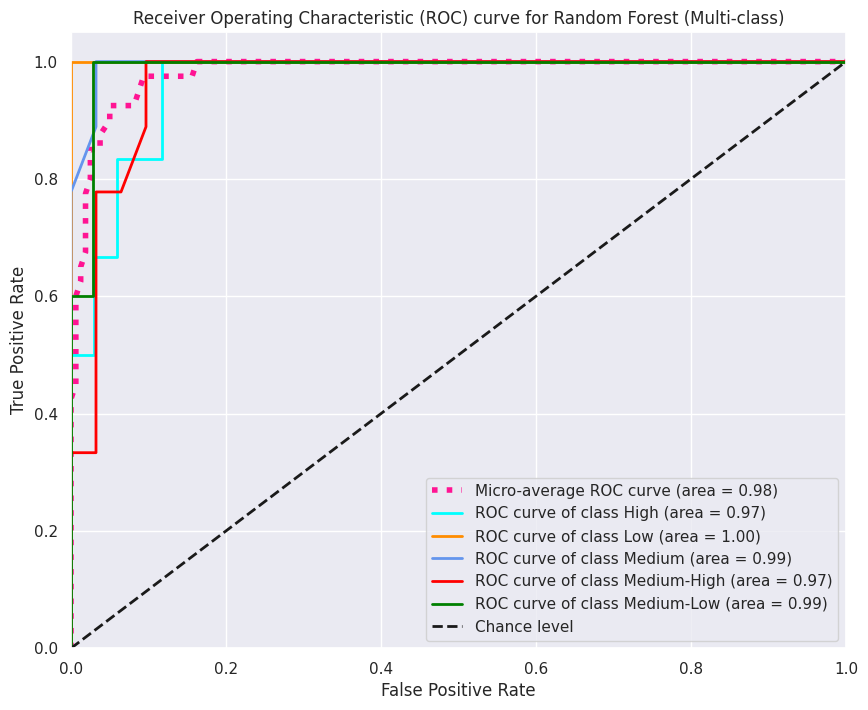

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
import matplotlib.pyplot as plt
import numpy as np

# 1. Generate predicted probabilities for each class using rfc_clf
y_score_rfc = rfc_clf.predict_proba(X_test)

# 2. Binarize the y_test labels for the OvR strategy.
# y_test_binarized was already created in the previous KNN cell, but ensuring it's correct for RFC context.
# The classes should match the classifier's classes, which are sorted alphabetically by default if not specified.
# However, label_binarize uses np.unique by default, which is usually sufficient.
# Let's ensure the classes are ordered as in the classifier.
classes = rfc_clf.classes_
y_test_binarized = label_binarize(y_test, classes=classes)

n_classes = len(classes)

# 3. Calculate the False Positive Rate (FPR), True Positive Rate (TPR), and Area Under the Curve (AUC) for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i, class_label in enumerate(classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score_rfc[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# 4. Calculate the micro-average ROC curve
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_score_rfc.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# 5. Plot all ROC curves on a single graph, including a diagonal reference line
plt.figure(figsize=(10, 8))
plt.plot(fpr["micro"], tpr["micro"],
         label=f'Micro-average ROC curve (area = {roc_auc["micro"]:0.2f})',
         color='deeppink', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {classes[i]} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Chance level')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) curve for Random Forest (Multi-class)')
plt.legend(loc="lower right")
plt.show()

## MODELO KNN con PCA

In [ ]:
# importar bibliotecas
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report,
                             precision_score, recall_score, f1_score, ConfusionMatrixDisplay,
                             cohen_kappa_score, roc_auc_score)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [ ]:
#@title Función para generar métricas
def fn_metricas_clasificacion(y_true, y_pred):
  print('Accuracy     : %.3f' % accuracy_score(y_true, y_pred))
  print("Precisión    : {}".format(precision_score(y_true, y_pred, average='weighted', zero_division=0)))
  print("Recall       : {}".format(recall_score(y_true, y_pred, average='weighted', zero_division=0)))
  print("Puntuación F1: {}".format(f1_score(y_true, y_pred, average='weighted', zero_division=0)))
  print("Cohen Kappa  : {}".format(cohen_kappa_score(y_true, y_pred)))

In [ ]:
#@title Crear función para visualizar métricas
def fn_metricas_info(modelo, y_verdadero, y_calculado):
    metrics = {
        'Accuracy': "%.5f" % accuracy_score(y_verdadero, y_calculado),
        'Precisión': "{}".format(precision_score(y_verdadero, y_calculado, average='weighted', zero_division=0)),
        'Recall': "{}".format(recall_score(y_verdadero, y_calculado, average='weighted', zero_division=0)),
        'Puntuación F1': "{}".format(f1_score(y_verdadero, y_calculado, average='weighted', zero_division=0)),
        'Cohen Kappa': "{}".format(cohen_kappa_score(y_verdadero, y_calculado))
    }
    return pd.DataFrame(metrics, index=[modelo])

In [ ]:
df_randomf['NY.GDP.MKTP.PP.KD_discretized'] = pd.qcut(df_randomf['NY.GDP.MKTP.PP.KD'], q=5, labels=['Low', 'Medium-Low', 'Medium', 'Medium-High', 'High'])
X = df_pca[['CP1','CP2','CP3','CP4','CP5']]
y = df_randomf['NY.GDP.MKTP.PP.KD_discretized']

In [ ]:
X_train, X_test, y_train, y_test =train_test_split(X, y,
                                                   test_size=0.2,
                                                   random_state=0,
                                                   stratify=y)

In [ ]:
# Estandarizar datos
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

In [ ]:
# KNN
knn = KNeighborsClassifier(n_neighbors=5)
# Aplicar modelo a datos de entrenamietno
knn_classifier = knn.fit(X_train_std, y_train)
# Predecir
y_pred_knn = knn_classifier.predict(X_test_std)

In [ ]:
pd.DataFrame({
    "y_pred": y_pred_knn,
    "y_true": y_test.reset_index(drop=True)
})


y_pred       y_true
0           Low          Low
1    Medium-Low  Medium-High
2   Medium-High         High
3           Low         High
4    Medium-Low         High
5   Medium-High   Medium-Low
6           Low   Medium-Low
7   Medium-High  Medium-High
8           Low       Medium
9        Medium          Low
10  Medium-High   Medium-Low
11          Low          Low
12  Medium-High         High
13         High  Medium-High
14          Low  Medium-High
15   Medium-Low       Medium
16       Medium          Low
17         High         High
18       Medium       Medium
19       Medium  Medium-High
20          Low          Low
21  Medium-High          Low
22       Medium          Low
23          Low   Medium-Low
24          Low       Medium
25         High         High
26          Low  Medium-High
27       Medium   Medium-Low
28       Medium       Medium
29       Medium       Medium
30          Low          Low
31  Medium-High         High
32         High         High
33          Low       Medium
34   Medium-Low   Medium-Low
35          Low  Medium-High
36       Medium   Medium-Low
37   Medium-Low       Medium
38          Low   Medium-Low
39  Medium-High  Medium-High

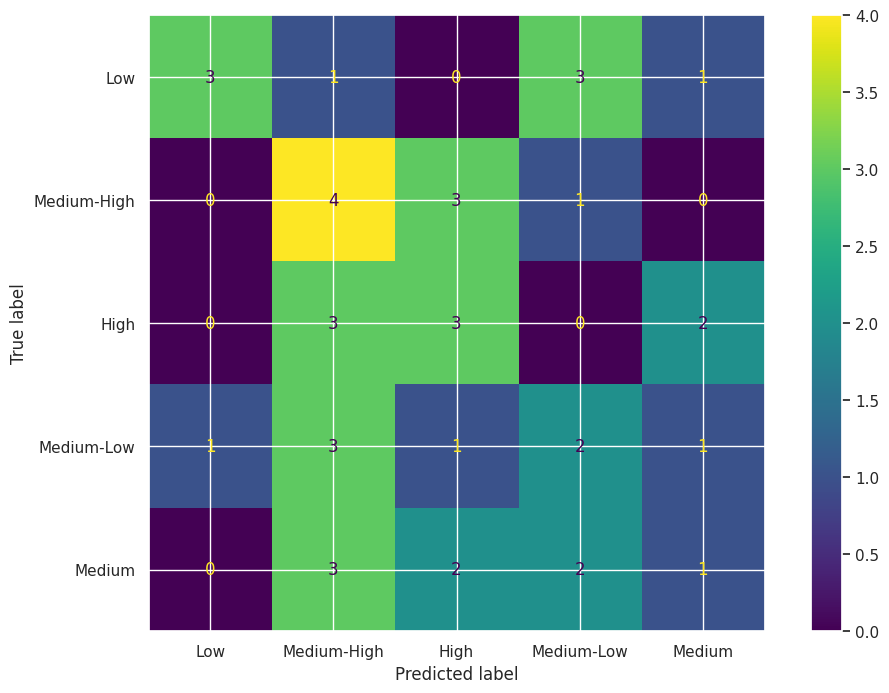

In [ ]:
#@title Generar matriz de confusión
cm = confusion_matrix(y_true=y_test, y_pred=y_pred_knn)
cm_display = ConfusionMatrixDisplay(cm, display_labels=y_test.unique()).plot()

In [ ]:
#@title Mostrar métricas
fn_metricas_clasificacion(y_test, y_pred_knn)

Accuracy     : 0.325
Precisión    : 0.36380952380952375
Recall       : 0.325
Puntuación F1: 0.32408473879062116
Cohen Kappa  : 0.1562499999999999


In [ ]:
#@title Mostrar Reporte
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

        High       0.75      0.38      0.50         8
         Low       0.29      0.50      0.36         8
      Medium       0.33      0.38      0.35         8
 Medium-High       0.25      0.25      0.25         8
  Medium-Low       0.20      0.12      0.15         8

    accuracy                           0.33        40
   macro avg       0.36      0.33      0.32        40
weighted avg       0.36      0.33      0.32        40



In [ ]:
probas = knn_classifier.predict_proba(X_test_std)
print('AUC-ROC:', roc_auc_score(y_test, probas, multi_class='ovr', average='weighted'))

AUC-ROC: 0.638671875


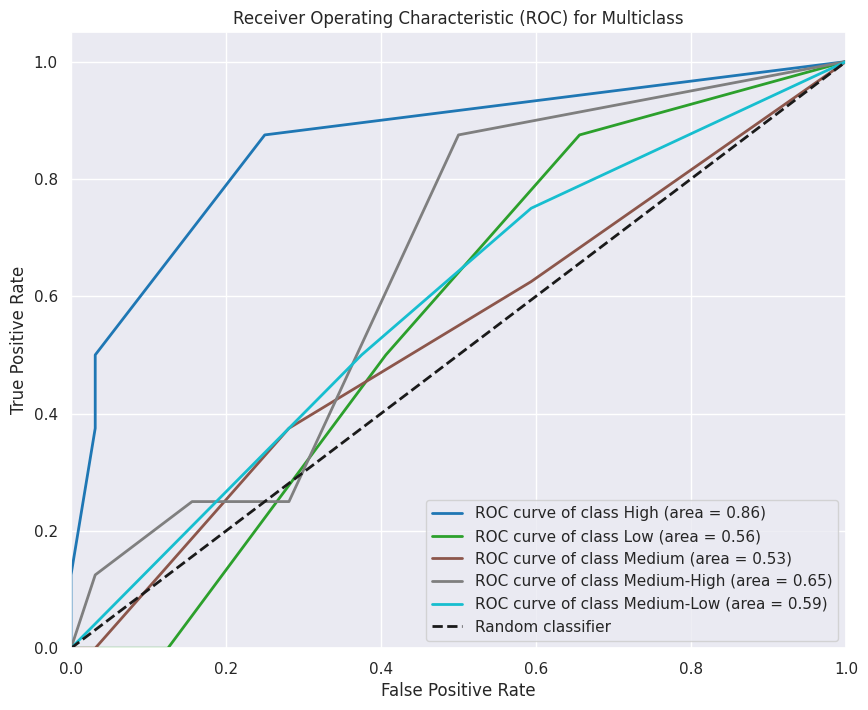

In [ ]:
# Curva ROC (One-vs-Rest para multiclass)
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer

# Binarize the output
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)
n_classes = y_test_bin.shape[1]

# Get probabilities for each class
probas = knn_classifier.predict_proba(X_test_std)

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
colors = plt.cm.get_cmap('tab10', n_classes)

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], probas[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors(i), lw=2,
             label=f'ROC curve of class {lb.classes_[i]} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Multiclass')
plt.legend(loc="lower right")
plt.show()

* los resultados son "atipicos", ya que se encuentran grandes diferencias entre los valores bajos y altos. Es esta la razon por la cual se pueden predecir los mejor los valores altos en comparacion con los bajos. Posiblemente falto una estandarizacion de los datos antes de aplicar la categorizacion.

In [ ]:
#@title Ajustes de Hiperparámetros
from sklearn.model_selection import KFold, GridSearchCV
# Generar las particiones
particiones = KFold(n_splits=5, shuffle=True, random_state=0)
# Generar diccionario con los hiperparámetros a aplicar
param_grid = {'n_neighbors': list(range(4,15)),
              'weights': ['uniform', 'distance'],
              'p': [1, 2]} # p=1 distancia de Manhattan; p=2 distancia euclidiana.
# Instanciar el modelo sin hiperparámetros
knn = KNeighborsClassifier()
# Aplicar GridSearchCV  usando el diccionario de hiperparámetros
mejor_modelo_knn = GridSearchCV(knn, param_grid = param_grid, scoring='accuracy', cv = particiones)
# Entrenar el modelo con datos train
mejor_modelo_knn.fit(X_train_std, y_train)
# Obtener los mejores parámetros
mejor_modelo_knn.best_params_

{'n_neighbors': 14, 'p': 1, 'weights': 'uniform'}

In [ ]:
# Bibliotecas
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler


# Particiones estratificadas
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# Hiperparámetros
param_grid = {
    'n_neighbors': list(range(4, 15)),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]   # 1 = Manhattan, 2 = Euclidiana
}

# Instanciar modelo
knn_base = KNeighborsClassifier()

# GridSearchCV
grid_knn = GridSearchCV(
    estimator=knn_base,
    param_grid=param_grid,
    scoring='accuracy',
    cv=cv,
    n_jobs=-1
)

# Entrenar modelo optimizado
grid_knn.fit(X_train_std, y_train)

# Mostrar hiperparámetros optimizados
print("Mejores parámetros:", grid_knn.best_params_)

Mejores parámetros: {'n_neighbors': 11, 'p': 1, 'weights': 'distance'}


In [ ]:
#@title Obtener el mejor modelo
modelo_final = grid_knn.best_estimator_
# Obtener predicciones con el set de test
y_pred_best = modelo_final.predict(X_test_std)
fn_metricas_clasificacion(y_test, y_pred_best)

Accuracy     : 0.450
Precisión    : 0.5185897435897436
Recall       : 0.45
Puntuación F1: 0.4598739495798319
Cohen Kappa  : 0.3125


In [ ]:
# Imprimir reporte de clasificación
print(classification_report(y_test, y_pred_best))

              precision    recall  f1-score   support

        High       1.00      0.50      0.67         8
         Low       0.38      0.62      0.48         8
      Medium       0.50      0.38      0.43         8
 Medium-High       0.38      0.38      0.38         8
  Medium-Low       0.33      0.38      0.35         8

    accuracy                           0.45        40
   macro avg       0.52      0.45      0.46        40
weighted avg       0.52      0.45      0.46        40



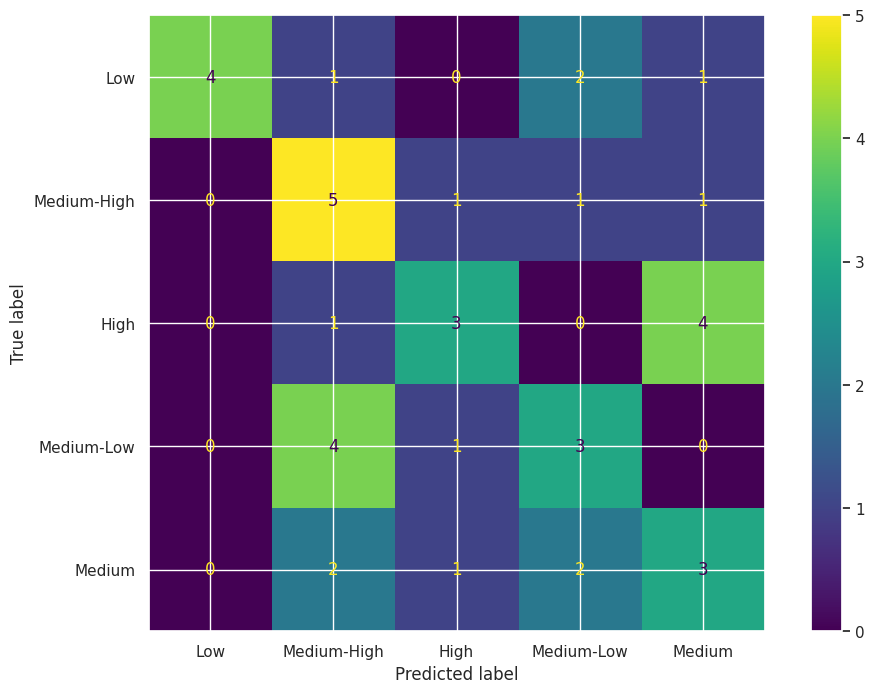

In [ ]:
#@title Generar matriz de confusión
cm_best = confusion_matrix(y_true=y_test, y_pred=y_pred_best)
ConfusionMatrixDisplay(cm_best, display_labels=y_test.unique()).plot()
plt.show()

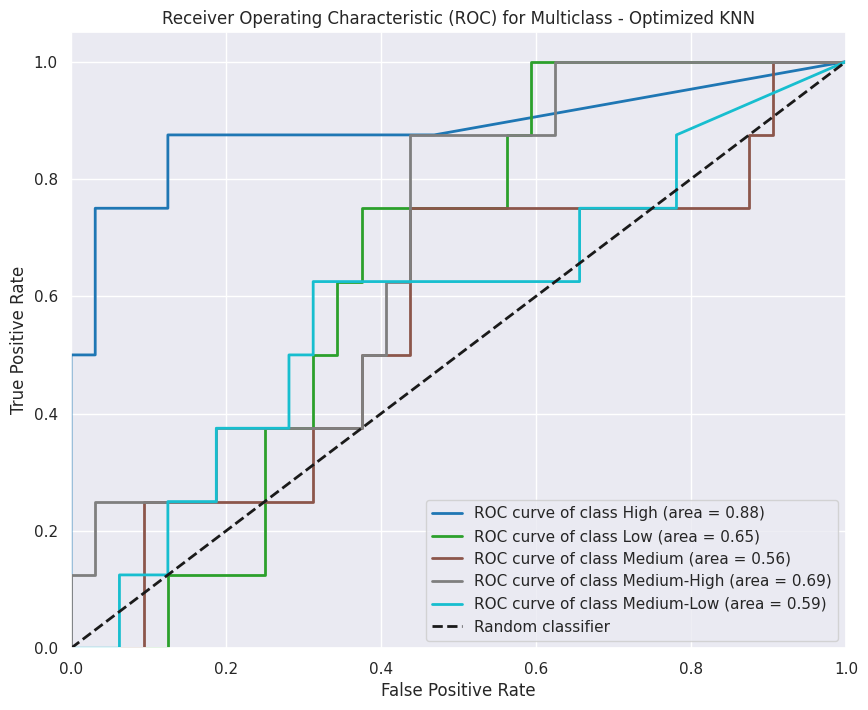

In [ ]:
#Curva ROC
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer

# Binarize the output
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)
n_classes = y_test_bin.shape[1]

# Get probabilities for each class
probas = modelo_final.predict_proba(X_test_std)

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
colors = plt.cm.get_cmap('tab10', n_classes)

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], probas[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors(i), lw=2,
             label=f'ROC curve of class {lb.classes_[i]} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Multiclass - Optimized KNN')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#@title Almacenar resultados del modelo
df_resultados = fn_metricas_info('knn-5', y_test, y_pred_knn)
df_resultados = pd.concat([df_resultados,
                           fn_metricas_info('knn-13', y_test, y_pred_best)],
                          axis =0)
df_resultados

Accuracy            Precisión Recall        Puntuación F1  \
knn-5   0.32500  0.36380952380952375  0.325  0.32408473879062116   
knn-13  0.45000   0.5185897435897436   0.45   0.4598739495798319   

               Cohen Kappa  
knn-5   0.1562499999999999  
knn-13              0.3125

## Random Forest Classifier con PCA


In [ ]:
# Importar biblioteca
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#@title Instanciar algoritmo de clasificación RFC
rfc_clf = RandomForestClassifier(
    random_state=0,
    class_weight="balanced",
    n_estimators=100
)
# Aplicar modelo a datos de entrenamietno
classifier = rfc_clf.fit(X_train, y_train)


In [ ]:
#@title Generar predicciones con datos test
y_pred_rfc = classifier.predict(X_test)

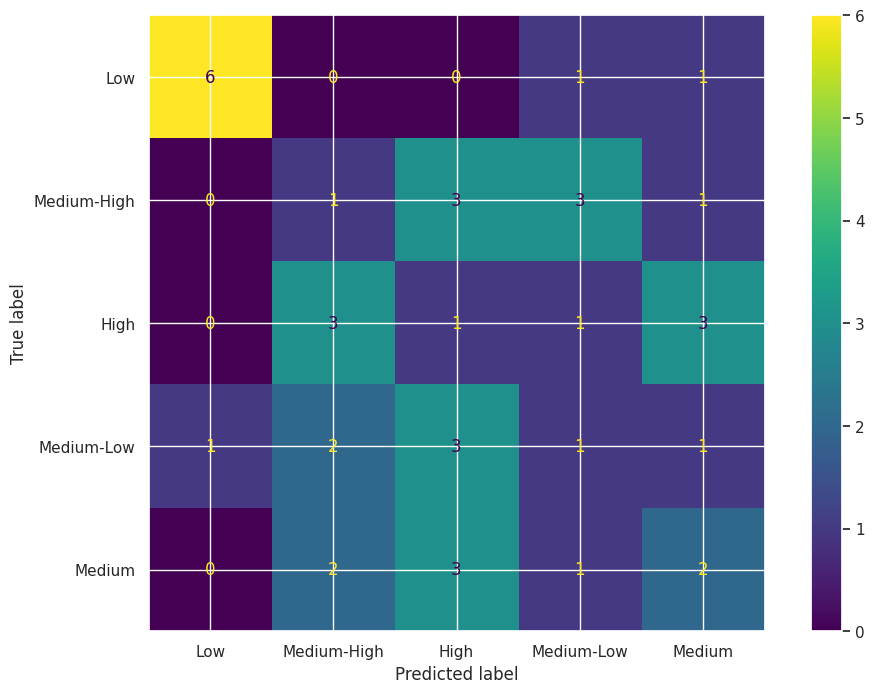

In [ ]:
#@title Generar matriz de confusión
cm = confusion_matrix(y_true=y_test, y_pred=y_pred_rfc)
ConfusionMatrixDisplay(cm, display_labels=y_test.unique()).plot()
plt.show()

In [ ]:
#@title Mostrar métricas
fn_metricas_clasificacion(y_test, y_pred_rfc)

Accuracy     : 0.275
Precisión    : 0.295
Recall       : 0.275
Puntuación F1: 0.2838888888888889
Cohen Kappa  : 0.09375


In [ ]:
#@title Mostrar Reporte
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

        High       0.86      0.75      0.80         8
         Low       0.12      0.12      0.12         8
      Medium       0.10      0.12      0.11         8
 Medium-High       0.14      0.12      0.13         8
  Medium-Low       0.25      0.25      0.25         8

    accuracy                           0.28        40
   macro avg       0.29      0.28      0.28        40
weighted avg       0.29      0.28      0.28        40



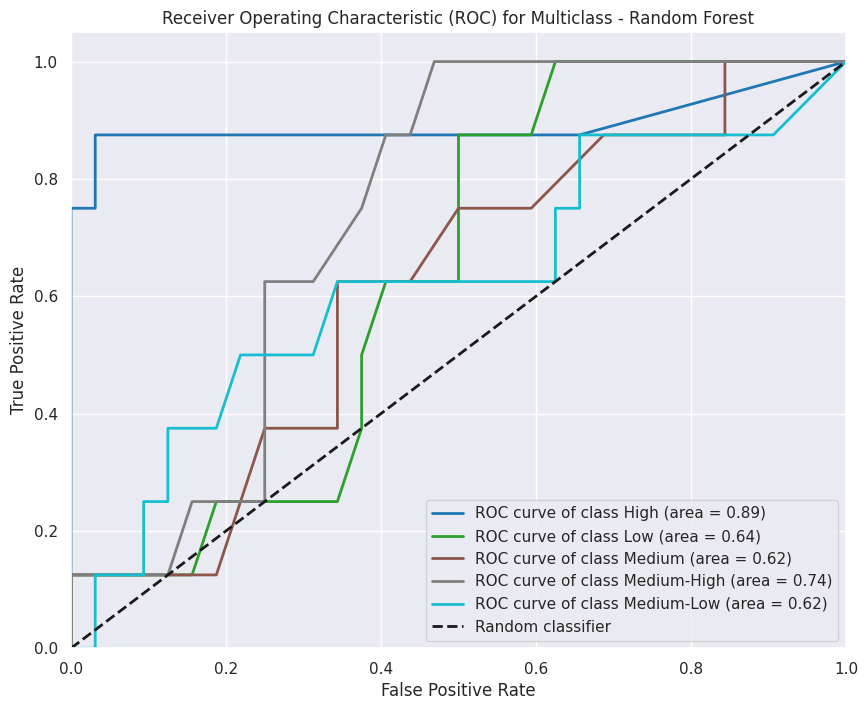

In [ ]:
# Curva ROC (One-vs-Rest para multiclass) - Random Forest
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer

# Binarize the output
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)
n_classes = y_test_bin.shape[1]

# Get probabilities for each class
# Use X_test here since rfc_clf was trained on unscaled X_train
probas = rfc_clf.predict_proba(X_test)

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
colors = plt.cm.get_cmap('tab10', n_classes)

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], probas[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors(i), lw=2,
             label=f'ROC curve of class {lb.classes_[i]} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Multiclass - Random Forest')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#@title Ajustes de Hiperparámetros
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Generar las particiones
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

# Definir los hiperparámetros y sus posibles valores
param_grid = {
    'n_estimators': [10,25,50],
    'max_depth' : [5,10,15],
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'min_samples_split': [16,20,30],
    'min_samples_leaf': [8,10,12],
}

# Instanciar el modelo sin hiperparámetros
rf_clf = RandomForestClassifier(
    class_weight='balanced',
    random_state=0
)
# Aplicar GridSearchCV  usando el diccionario de hiperparámetros
mejor_modelo_rfc = GridSearchCV(
    estimator=rf_clf,
    param_grid=param_grid,
    cv=cv,
    scoring='accuracy',
    n_jobs=-1
)

# Entrenar el modelo con datos train
mejor_modelo_rfc.fit(X_train, y_train)

# Obtener los mejores parámetros
mejor_modelo_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 12,
 'min_samples_split': 16,
 'n_estimators': 50}

In [ ]:
mejor_modelo_rfc.best_estimator_

RandomForestClassifier(class_weight='balanced', max_depth=5,
                       min_samples_leaf=12, min_samples_split=16,
                       n_estimators=50, random_state=0)

In [ ]:
modelo_final_pca2 = RandomForestClassifier(
    class_weight='balanced', criterion='entropy',
    max_depth=10, min_samples_leaf=12, min_samples_split=16,
    n_estimators=10, random_state=0
)

In [ ]:
#@title Obtener el mejor modelo
modelo_final = mejor_modelo_rfc.best_estimator_

# Obtener predicciones con el set de test
y_pred_opt = modelo_final.predict(X_test)

# Imprimir reporte de clasificación
print(classification_report(y_test, y_pred_opt))

              precision    recall  f1-score   support

        High       0.88      0.88      0.88         8
         Low       0.25      0.12      0.17         8
      Medium       0.22      0.25      0.24         8
 Medium-High       0.50      0.38      0.43         8
  Medium-Low       0.38      0.62      0.48         8

    accuracy                           0.45        40
   macro avg       0.45      0.45      0.44        40
weighted avg       0.45      0.45      0.44        40



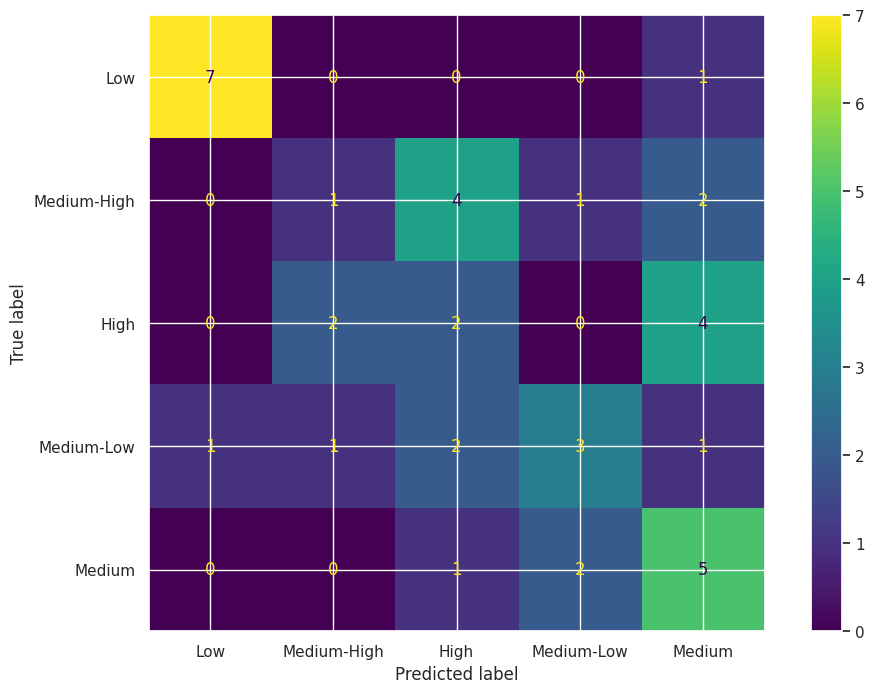

In [ ]:
cm2 = confusion_matrix(y_test, y_pred_opt)
ConfusionMatrixDisplay(cm2, display_labels=y_test.unique()).plot()
plt.show()

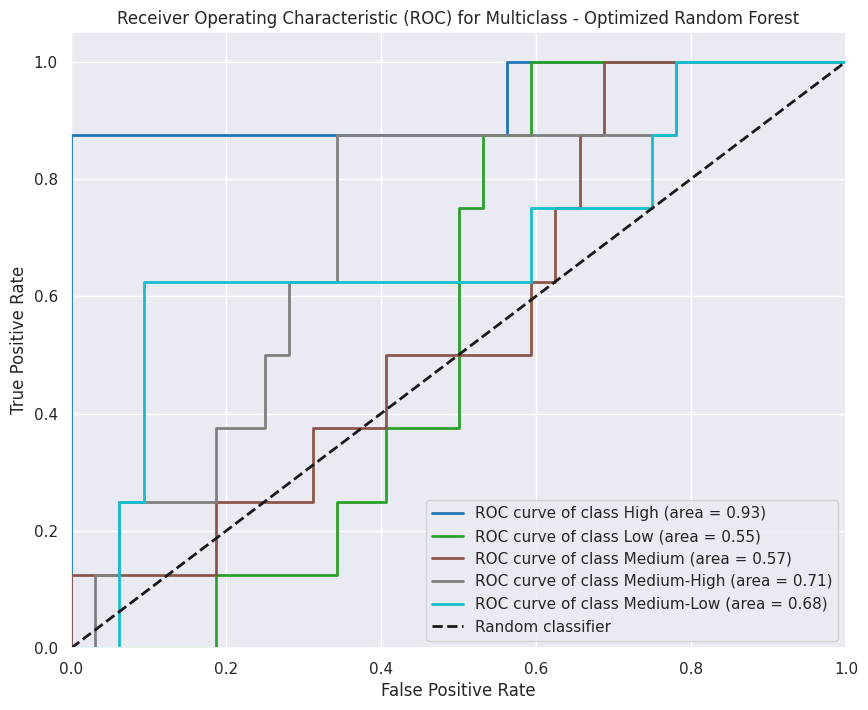

In [ ]:
# Curva ROC optimizada (One-vs-Rest para multiclass)
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt

# Binarize the output
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)
n_classes = y_test_bin.shape[1]

# Get probabilities for each class from the optimized model
probas = modelo_final.predict_proba(X_test)

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
colors = plt.cm.get_cmap('tab10', n_classes)

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], probas[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors(i), lw=2,
             label=f'ROC curve of class {lb.classes_[i]} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Multiclass - Optimized Random Forest')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#@title Métricas del modelo
metrica = fn_metricas_info('random_forest', y_test, y_pred_opt)
metrica

Accuracy           Precisión Recall       Puntuación F1  \
random_forest  0.45000  0.4463675213675214   0.45  0.4363445378151261   

              Cohen Kappa  
random_forest      0.3125

In [ ]:
#@title Almacenar resultados del modelo
if 'df_resultados' not in locals() or df_resultados.empty:
    df_resultados = metrica
else:
    df_resultados = pd.concat([df_resultados, metrica])
df_resultados

Accuracy           Precisión Recall       Puntuación F1  \
random_forest  0.45000  0.4463675213675214   0.45  0.4363445378151261   

              Cohen Kappa  
random_forest      0.3125

# Conclusion


* El mejor modelo de clasificacion en nuestro caso fue el random forest classifier, esto puede ser debido a que no existio una previa estandarizacion de los datos previos. Esto es debido a que existe una gran diferencia entre los datos de mayor valor (HIGH) comparado con los de bajo valor (LOW).